In [1]:
file_path = '/home/krispy_noodles/SIT_Chatbot/assets/SIT_User_Study.xlsx'

In [ ]:
def plot_comparisons_with_average(sheet_name):
    """
    Function to plot comparisons between Chatbot and Manual Search metrics from an Excel sheet,
    including average lines on the line graph and bar graph, using SIT-inspired colors.

    Parameters:
    - sheet_name: str or int, name or index of the sheet to load.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # SIT-inspired color palette
    sit_colors = ['#FF0000', '#000000', '#FFFFFF', '#F0F0F0', '#808080']
    
    # Load the sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Clean the DataFrame
    df_cleaned = df.drop(columns=['Unnamed: 5'], errors='ignore').rename(columns={'Unnamed: 0': 'Participant'})
    df_cleaned = df_cleaned.dropna().reset_index(drop=True)

    # Convert columns to appropriate data types
    for col in ['Chatbot (time)', 'Chatbot (no of text send)', 'Manual Search (time in sec)', 'Manual Search (pages navigated)']:
        if col in df_cleaned.columns:
            df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

    # Plot 1: Chatbot Time vs. Manual Search Time (with average line and task completion markers)
    plt.figure(figsize=(12, 6), dpi=300)
    sns.lineplot(data=df_cleaned, x='Participant', y='Chatbot (time)', label='Chatbot Time', marker='o', color=sit_colors[0])
    sns.lineplot(data=df_cleaned, x='Participant', y='Manual Search (time in sec)', label='Manual Search Time', marker='o', color=sit_colors[1])
    
    # Add average lines
    plt.axhline(y=df_cleaned['Chatbot (time)'].mean(), color=sit_colors[0], linestyle='--', label='Chatbot Time Average')
    plt.axhline(y=df_cleaned['Manual Search (time in sec)'].mean(), color=sit_colors[1], linestyle='dotted', label='Manual Search Time Average')

    # Mark task completion failures with 'x'
    failed_chatbot = df_cleaned[df_cleaned['Task Completed (Chatbot)'] == False]
    failed_manual = df_cleaned[df_cleaned['Task Completed (Manual)'] == False]
    
    if not failed_chatbot.empty:
        plt.scatter(failed_chatbot['Participant'], failed_chatbot['Chatbot (time)'], 
                    color='red', marker='x', label='Chatbot Failure', s=100, linewidths=2)

        # Add annotations above the 'x' markers
        for i, row in failed_chatbot.iterrows():
            plt.text(row['Participant'], row['Chatbot (time)'] + 4, 'Failed',  # +4 for above, -10 for below
                     color='red', fontsize=10, ha='center')
    
    if not failed_manual.empty:        
        plt.scatter(failed_manual['Participant'], failed_manual['Manual Search (time in sec)'], 
                    color='black', marker='x', label='Manual Search Failure', s=100)
    
    plt.title(f"Comparison of Chatbot Time and Manual Search Time - {sheet_name}", color=sit_colors[1], fontweight="bold")
    plt.xlabel("Participants", color=sit_colors[1])
    plt.ylabel("Time (seconds)", color=sit_colors[1])
    plt.xticks(rotation=45, color=sit_colors[1])
    plt.yticks(color=sit_colors[1])
    plt.legend()
    plt.grid(True, color=sit_colors[3])
    plt.tight_layout()
    plt.show()

    # Plot 2: Chatbot Messages Sent (with average lines)
    plt.figure(figsize=(12, 6), dpi=300)
    bar_data = df_cleaned.melt(id_vars=['Participant'], value_vars=['Chatbot (no of text send)'])
    sns.barplot(data=bar_data, x='Participant', y='value', hue='variable', palette=[sit_colors[0]], alpha=0.7)
    
    # Add average lines
    chatbot_avg = df_cleaned['Chatbot (no of text send)'].mean()
    plt.axhline(y=chatbot_avg, color=sit_colors[0], linestyle='--', label='Chatbot Messages Average')
    
    plt.title(f"Comparison of Chatbot Messages Sent - {sheet_name}", color=sit_colors[1], fontweight="bold")
    plt.xlabel("Participants", color=sit_colors[1])
    plt.ylabel("Count", color=sit_colors[1])
    plt.xticks(rotation=45, color=sit_colors[1])
    plt.yticks(color=sit_colors[1])
    plt.legend()
    plt.grid(True, color=sit_colors[3])
    plt.tight_layout()
    plt.show()

    # Plot 3: Manual Pages Navigated (with average lines)
    plt.figure(figsize=(12, 6), dpi=300)
    bar_data = df_cleaned.melt(id_vars=['Participant'], value_vars=['Manual Search (pages navigated)'])
    sns.barplot(data=bar_data, x='Participant', y='value', hue='variable', palette=[sit_colors[1]], alpha=0.7)
    
    # Add average lines
    manual_avg = df_cleaned['Manual Search (pages navigated)'].mean()
    plt.axhline(y=manual_avg, color=sit_colors[1], linestyle='dotted', label='Manual Pages Average')
    
    plt.title(f"Comparison of Manual Pages Navigated - {sheet_name}", color=sit_colors[1], fontweight="bold")
    plt.xlabel("Participants", color=sit_colors[1])
    plt.ylabel("Count", color=sit_colors[1])
    plt.xticks(rotation=45, color=sit_colors[1])
    plt.yticks(color=sit_colors[1])
    plt.legend()
    plt.grid(True, color=sit_colors[3])
    plt.tight_layout()
    plt.show()

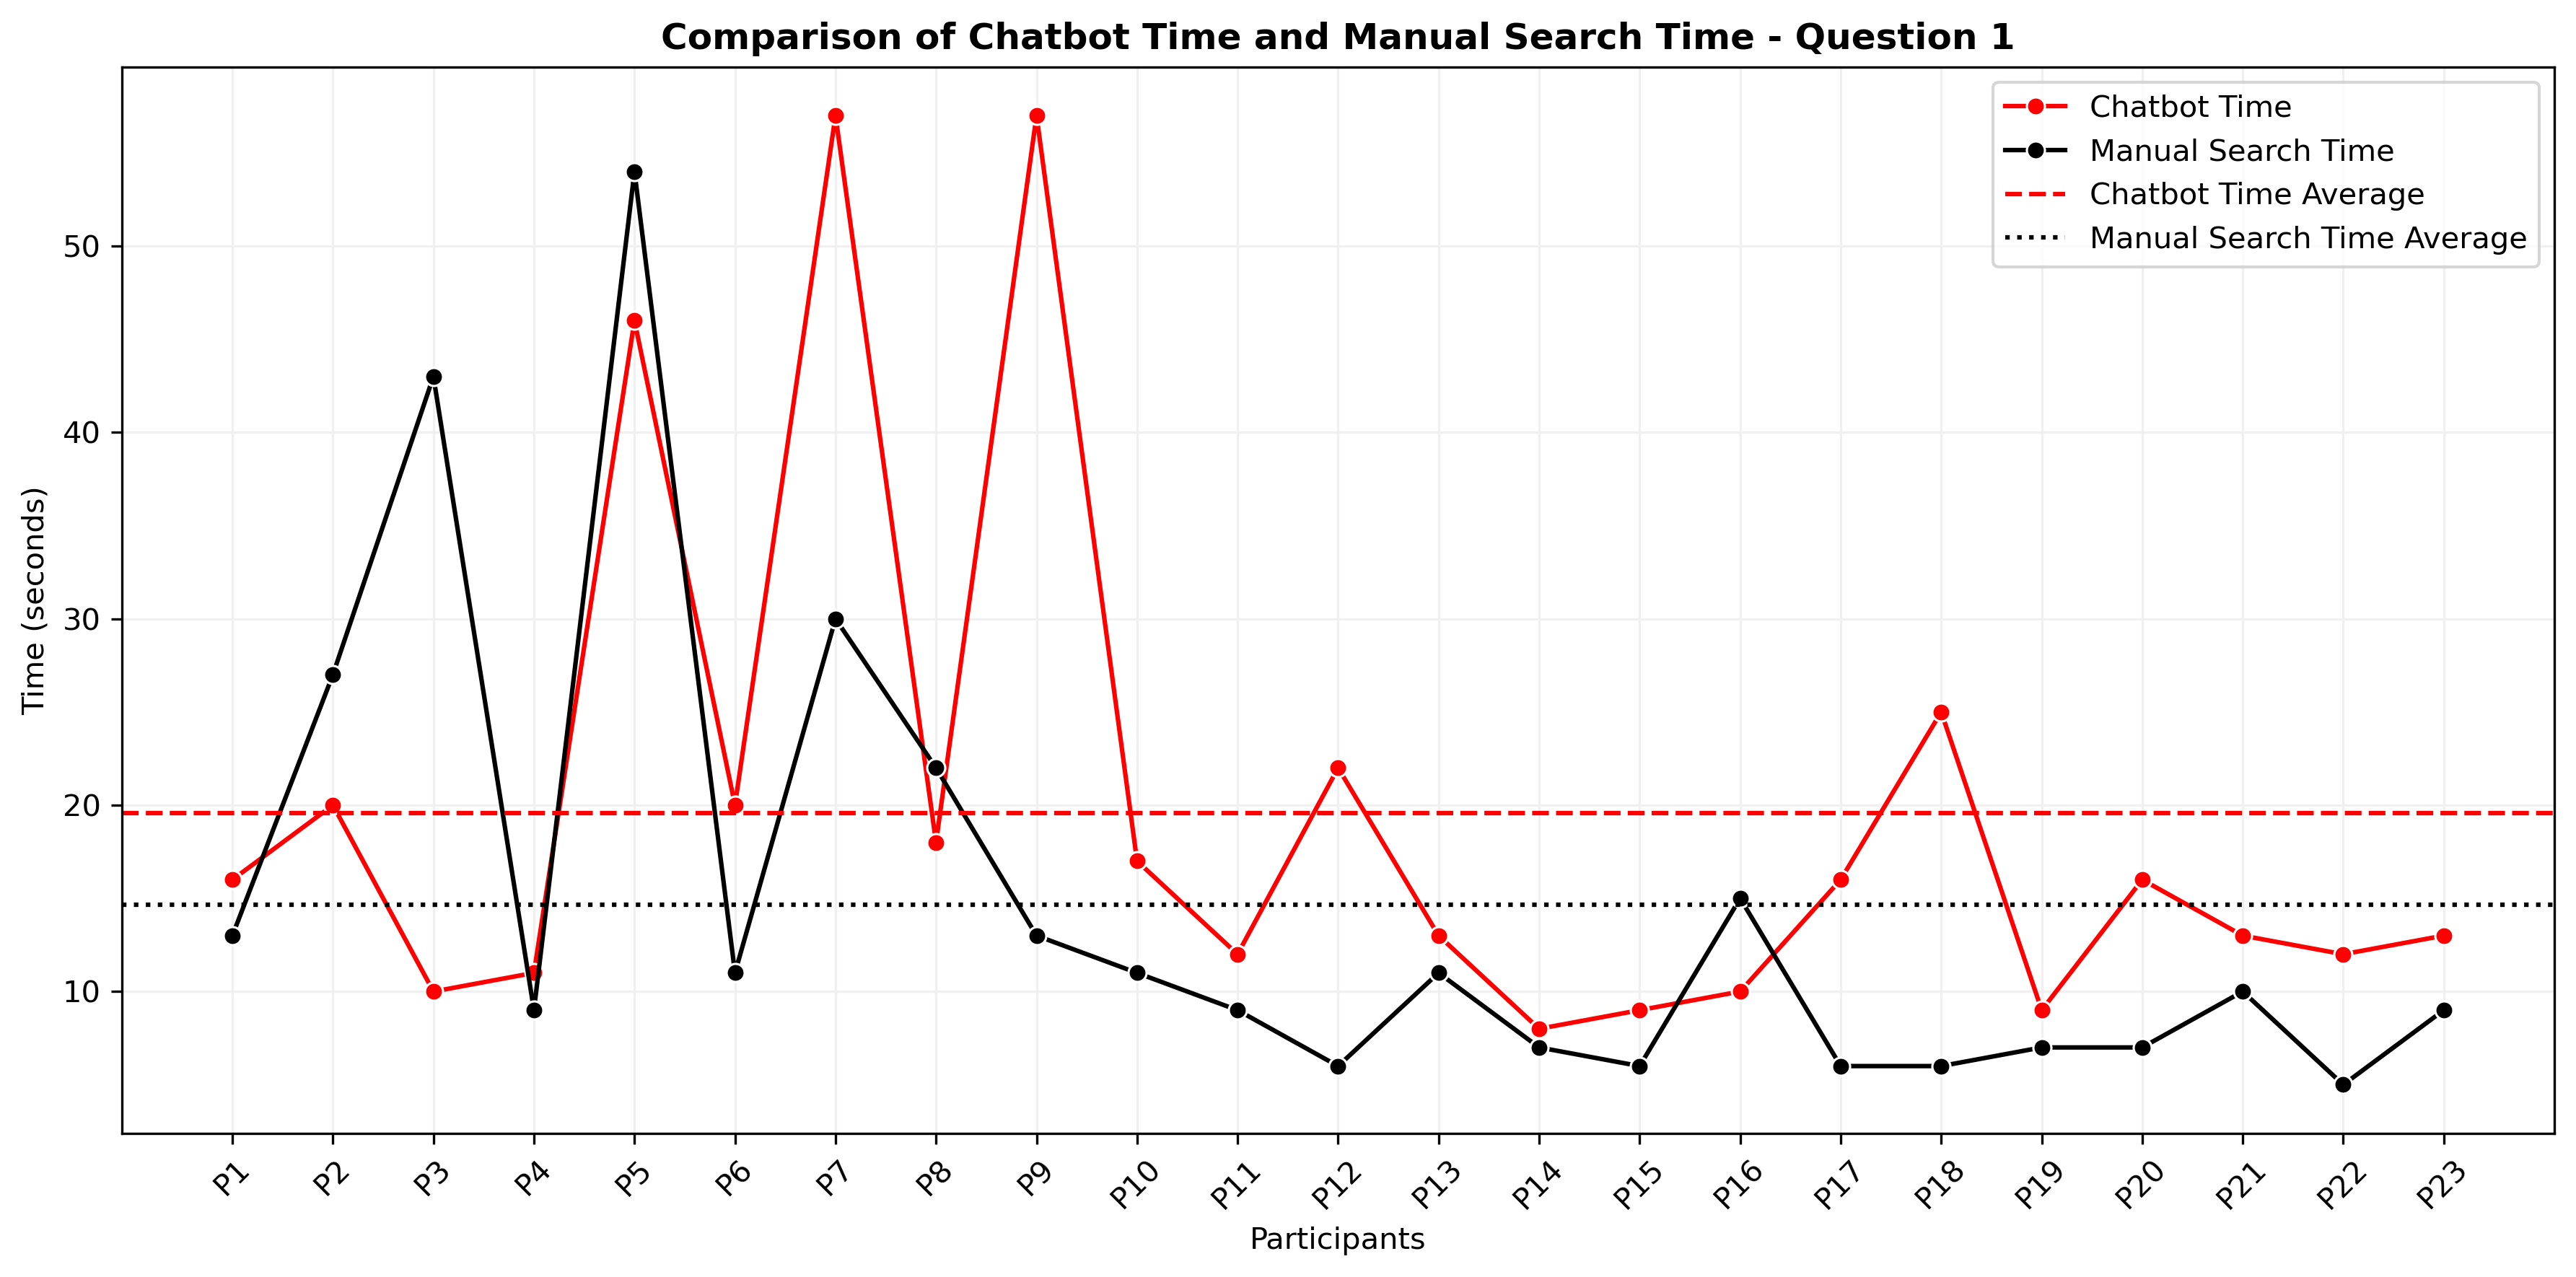

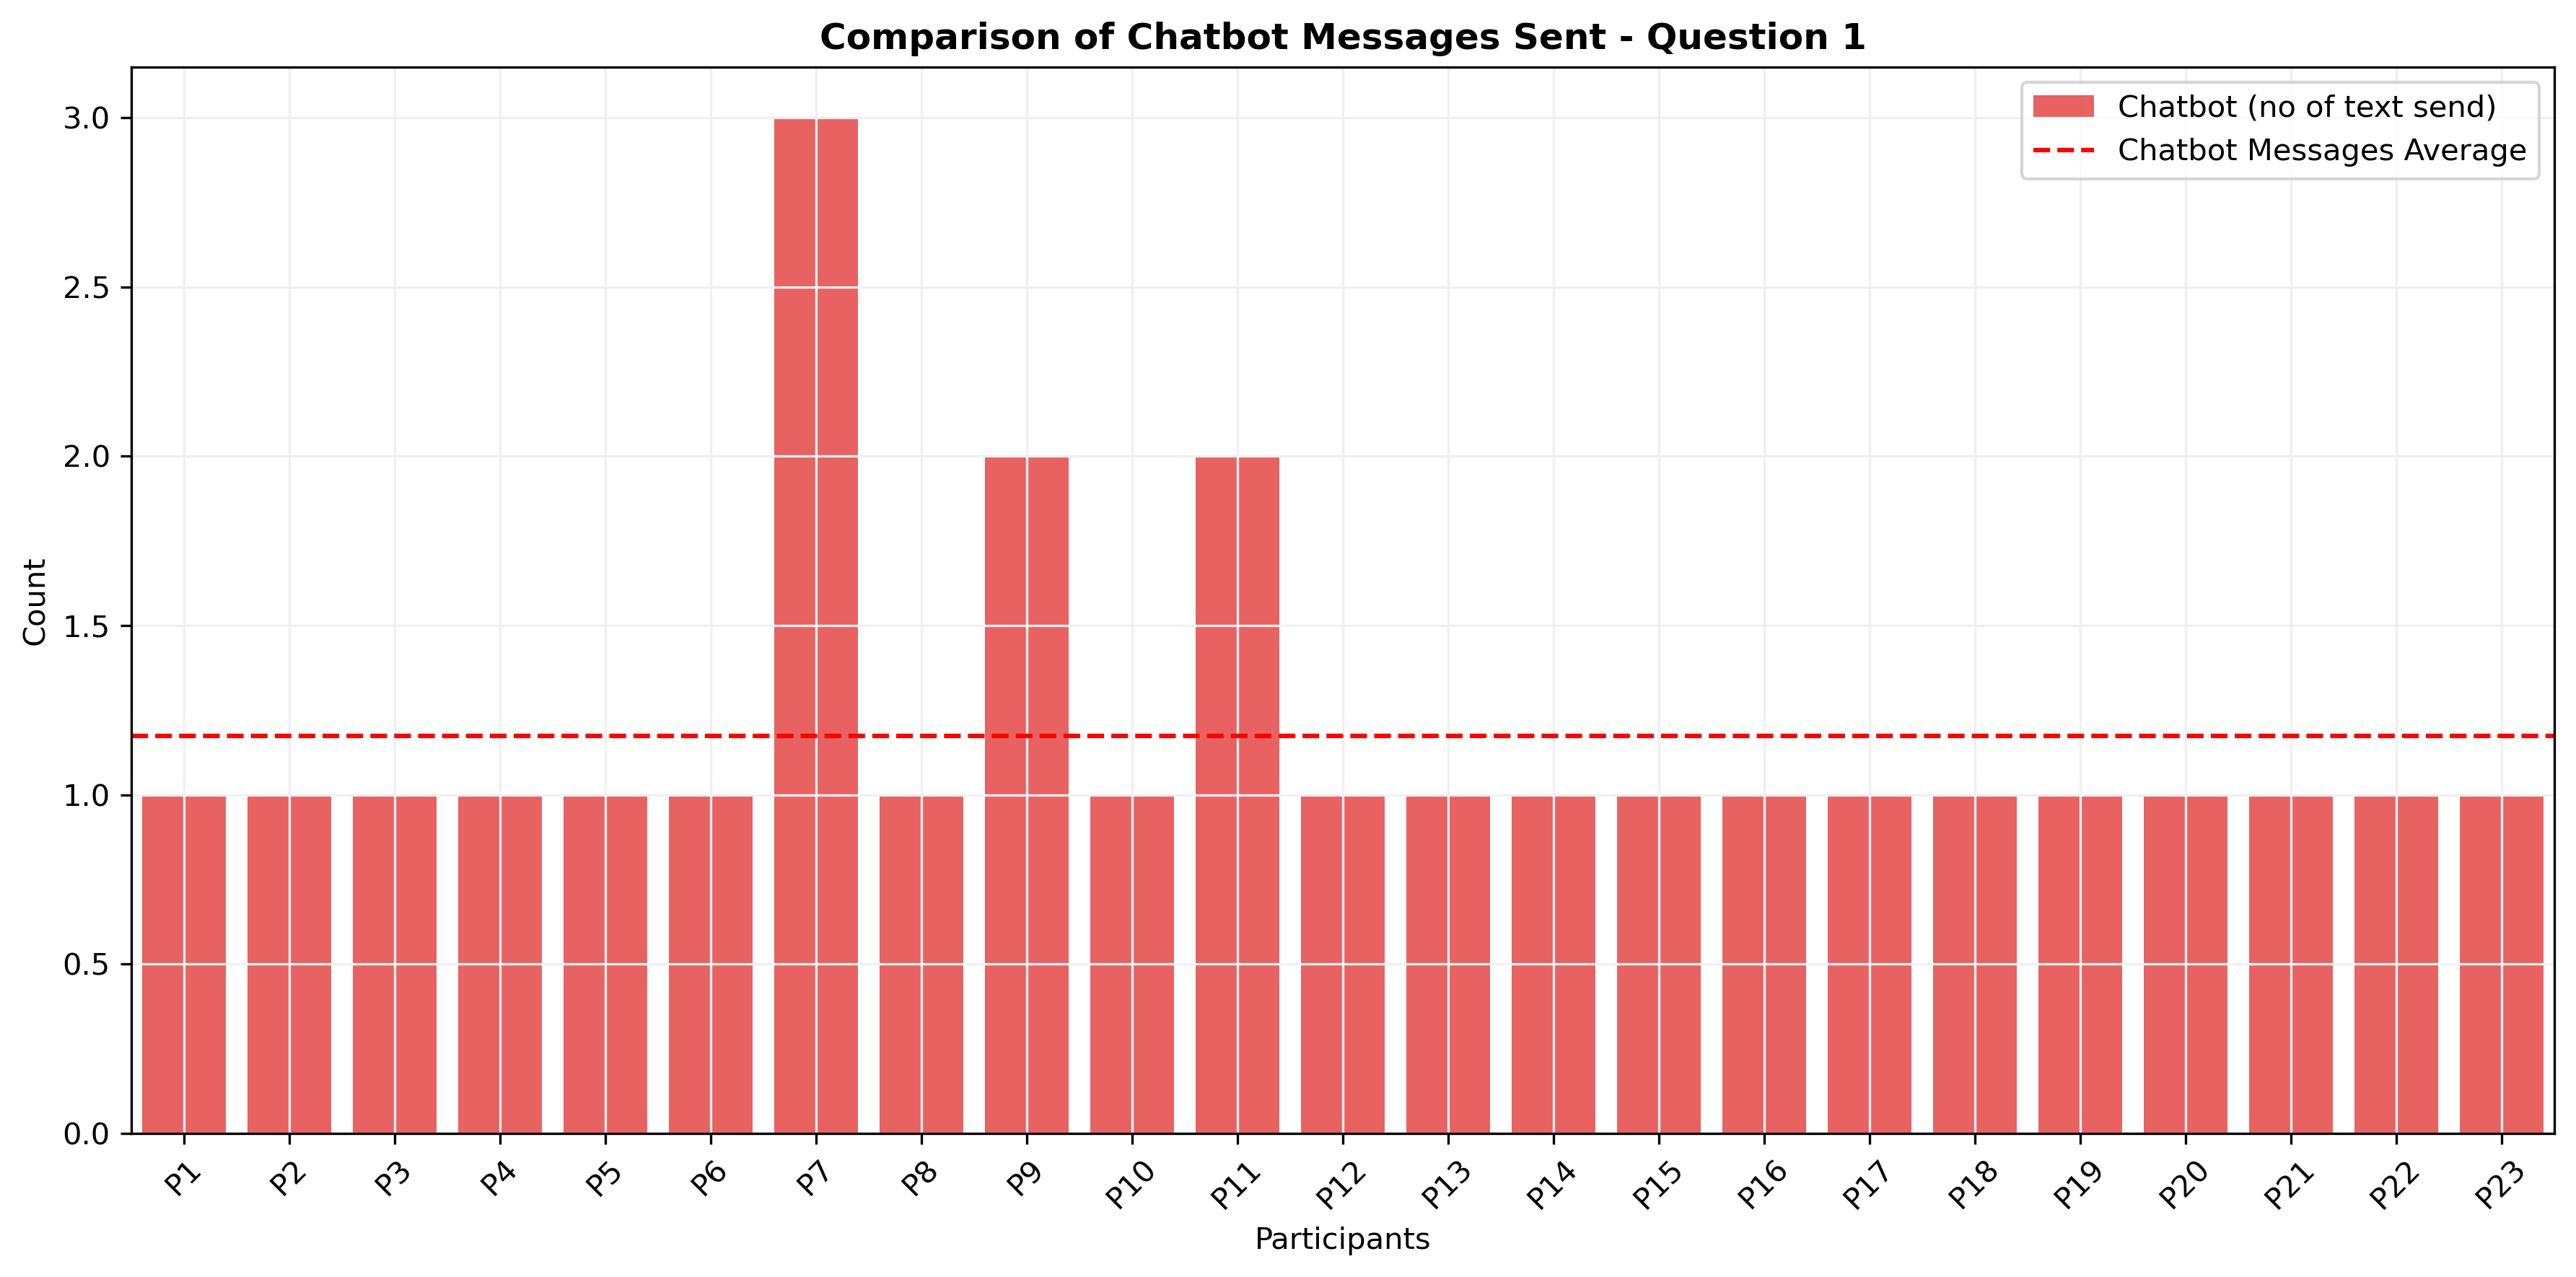

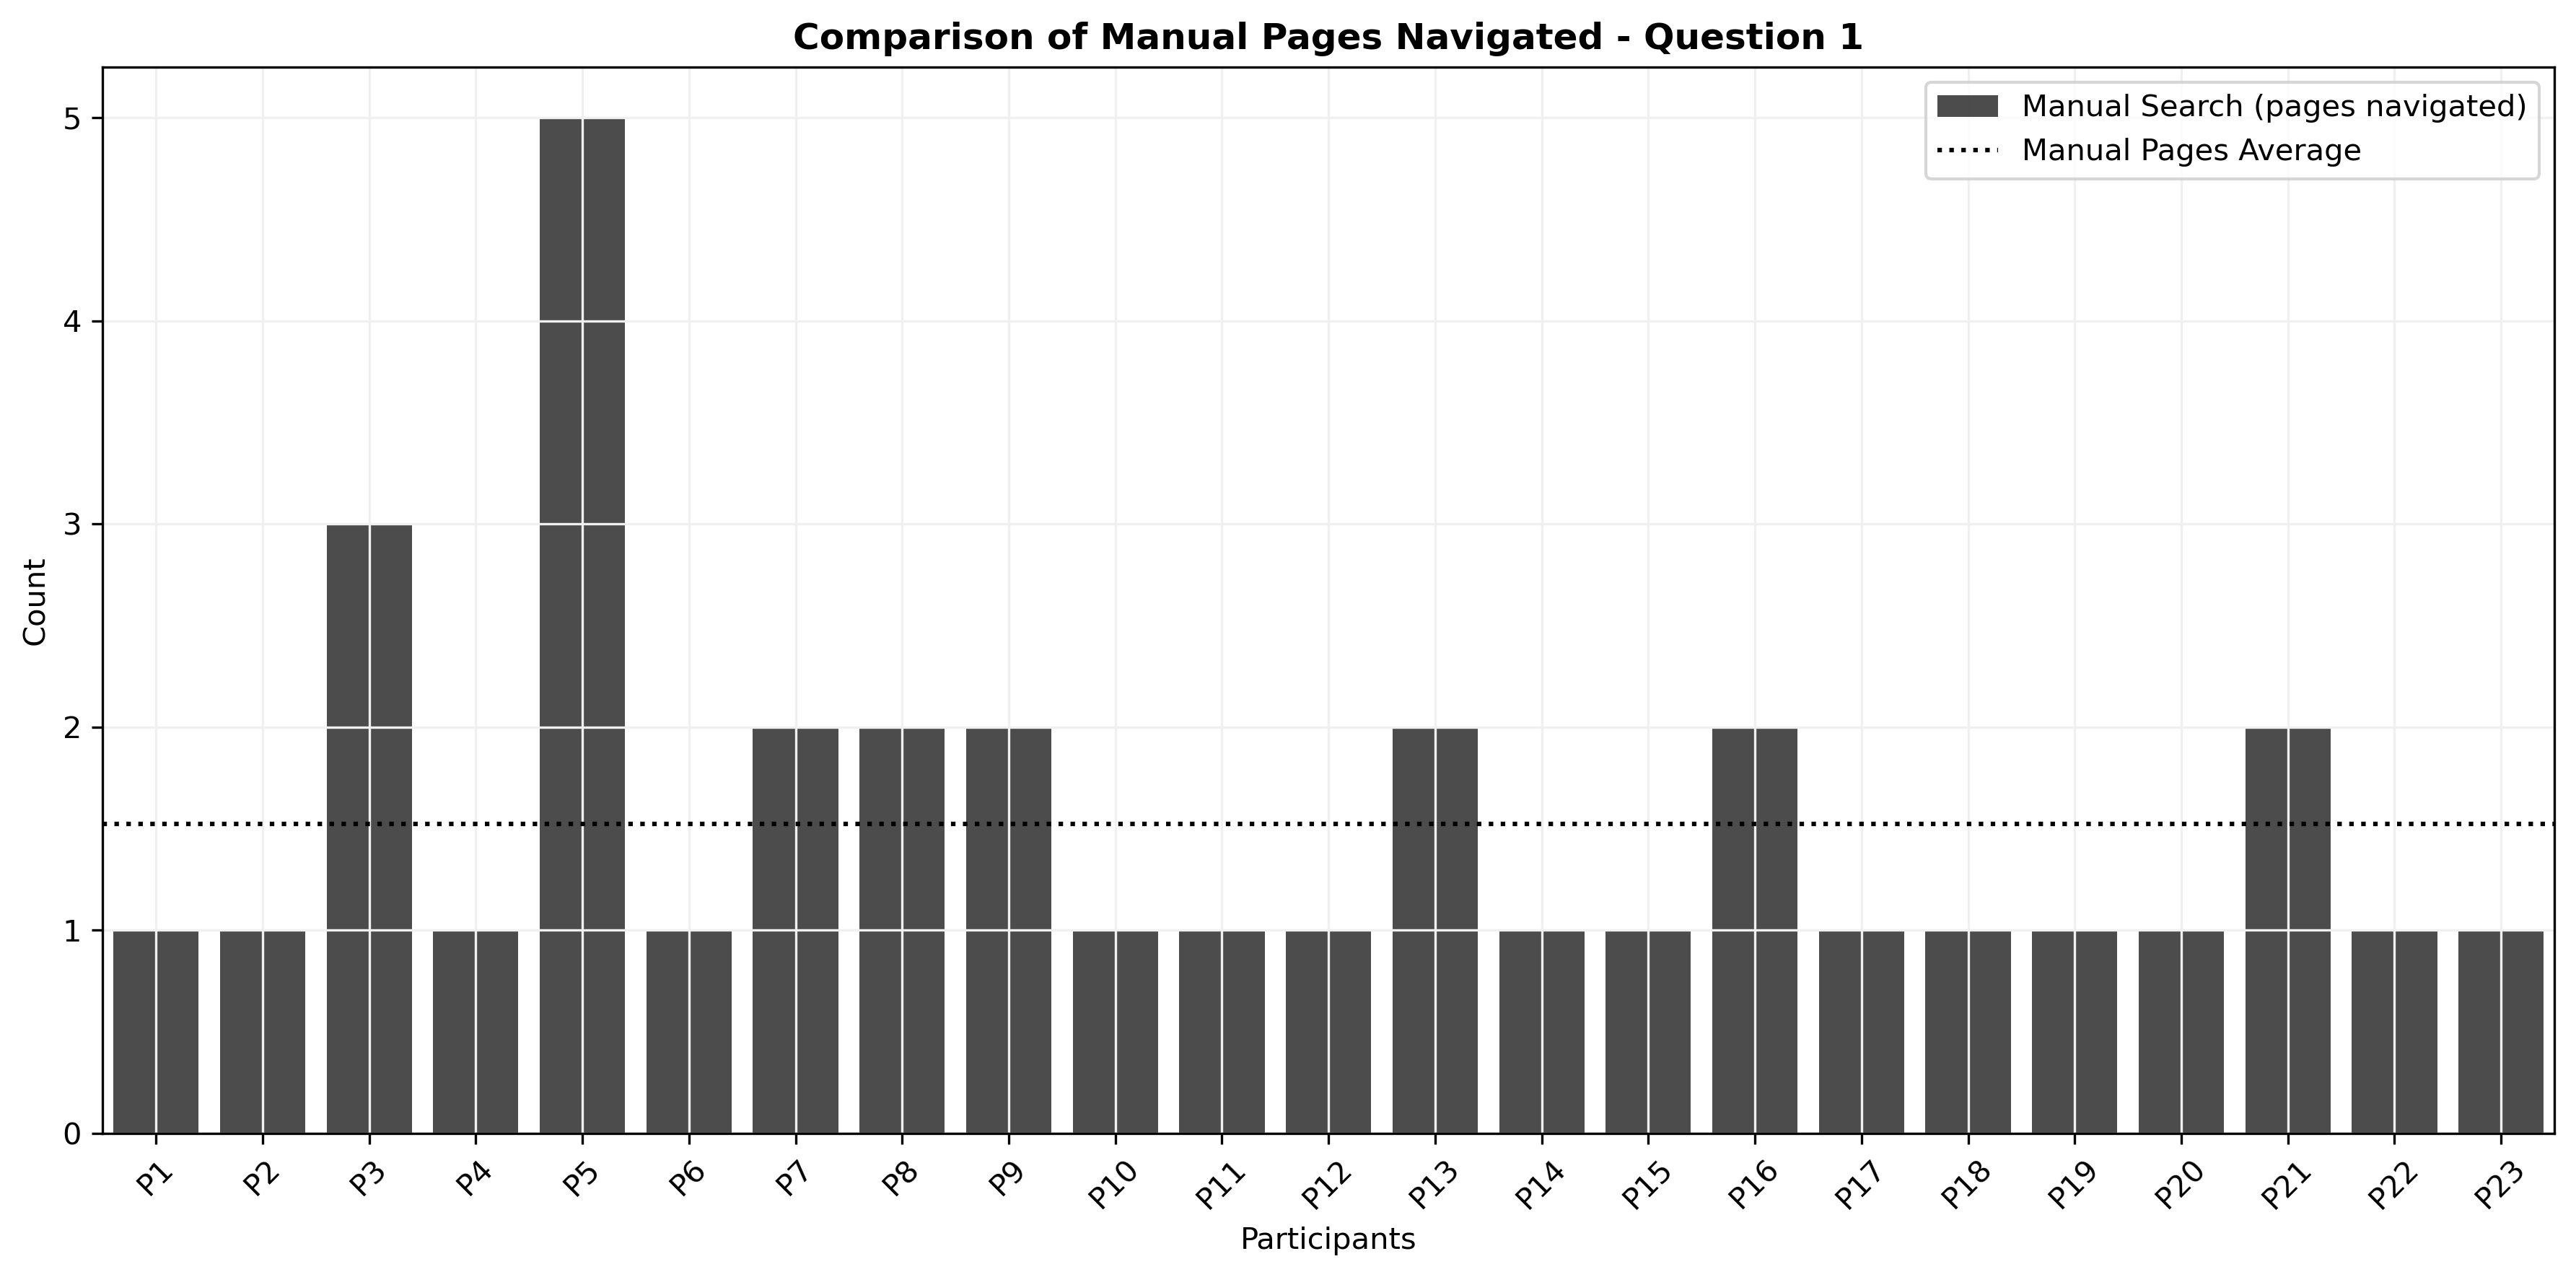

In [3]:
# Example usage for the first sheet
plot_comparisons_with_average(sheet_name='Question 1')

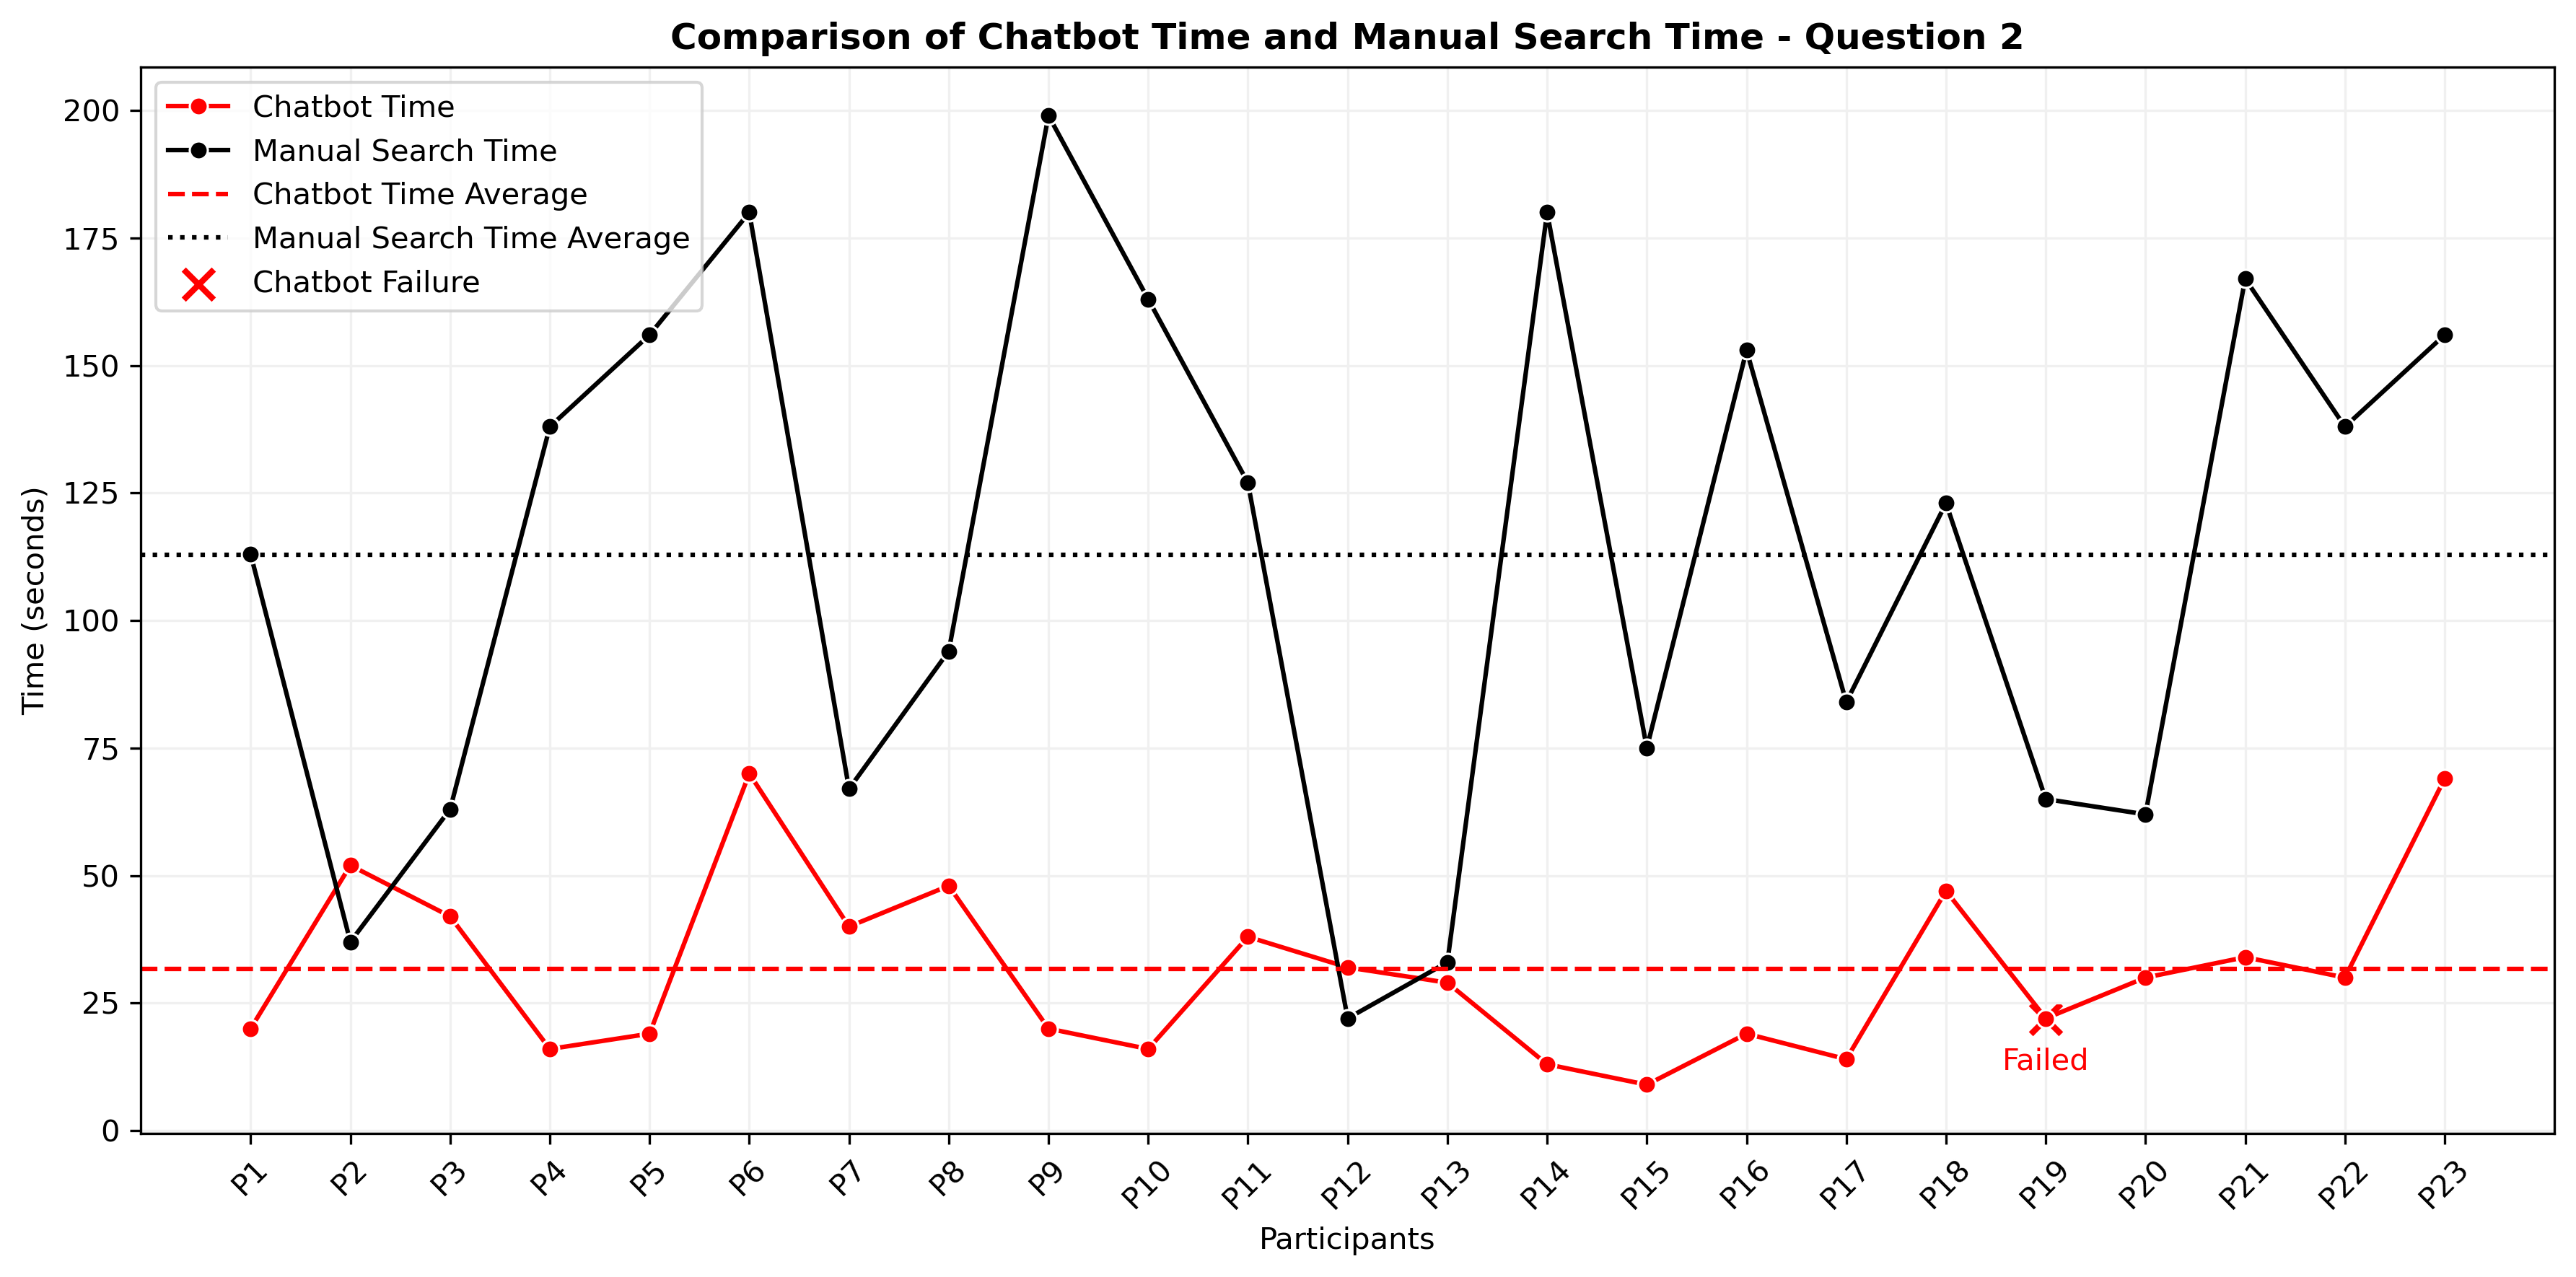

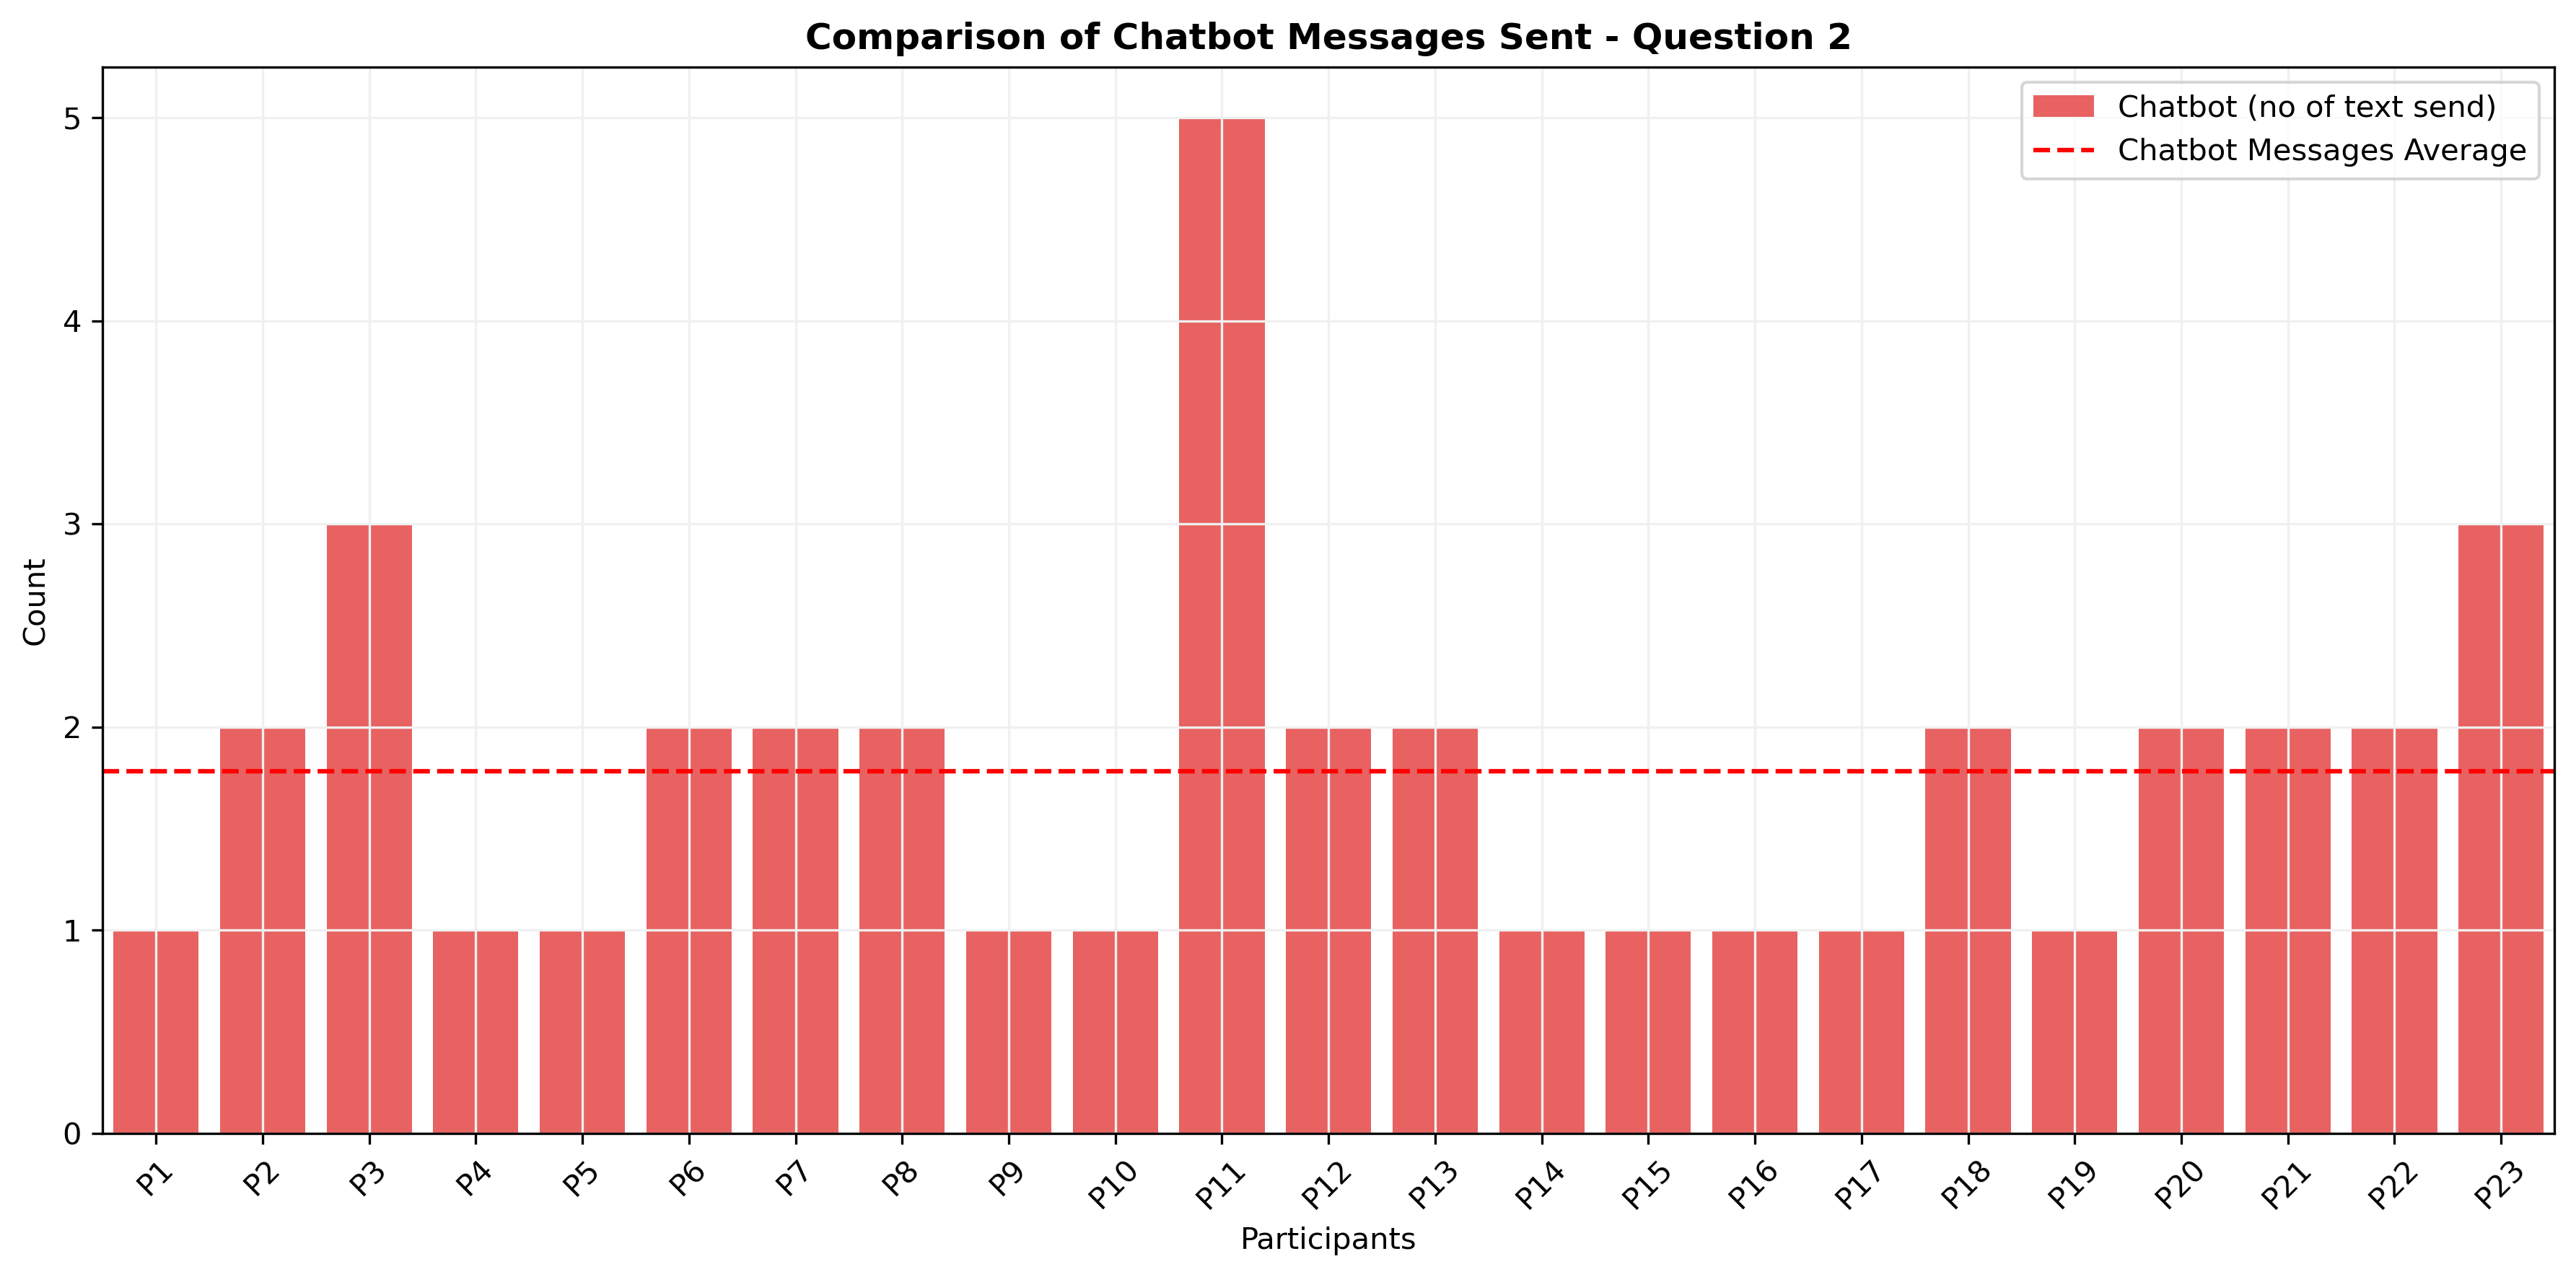

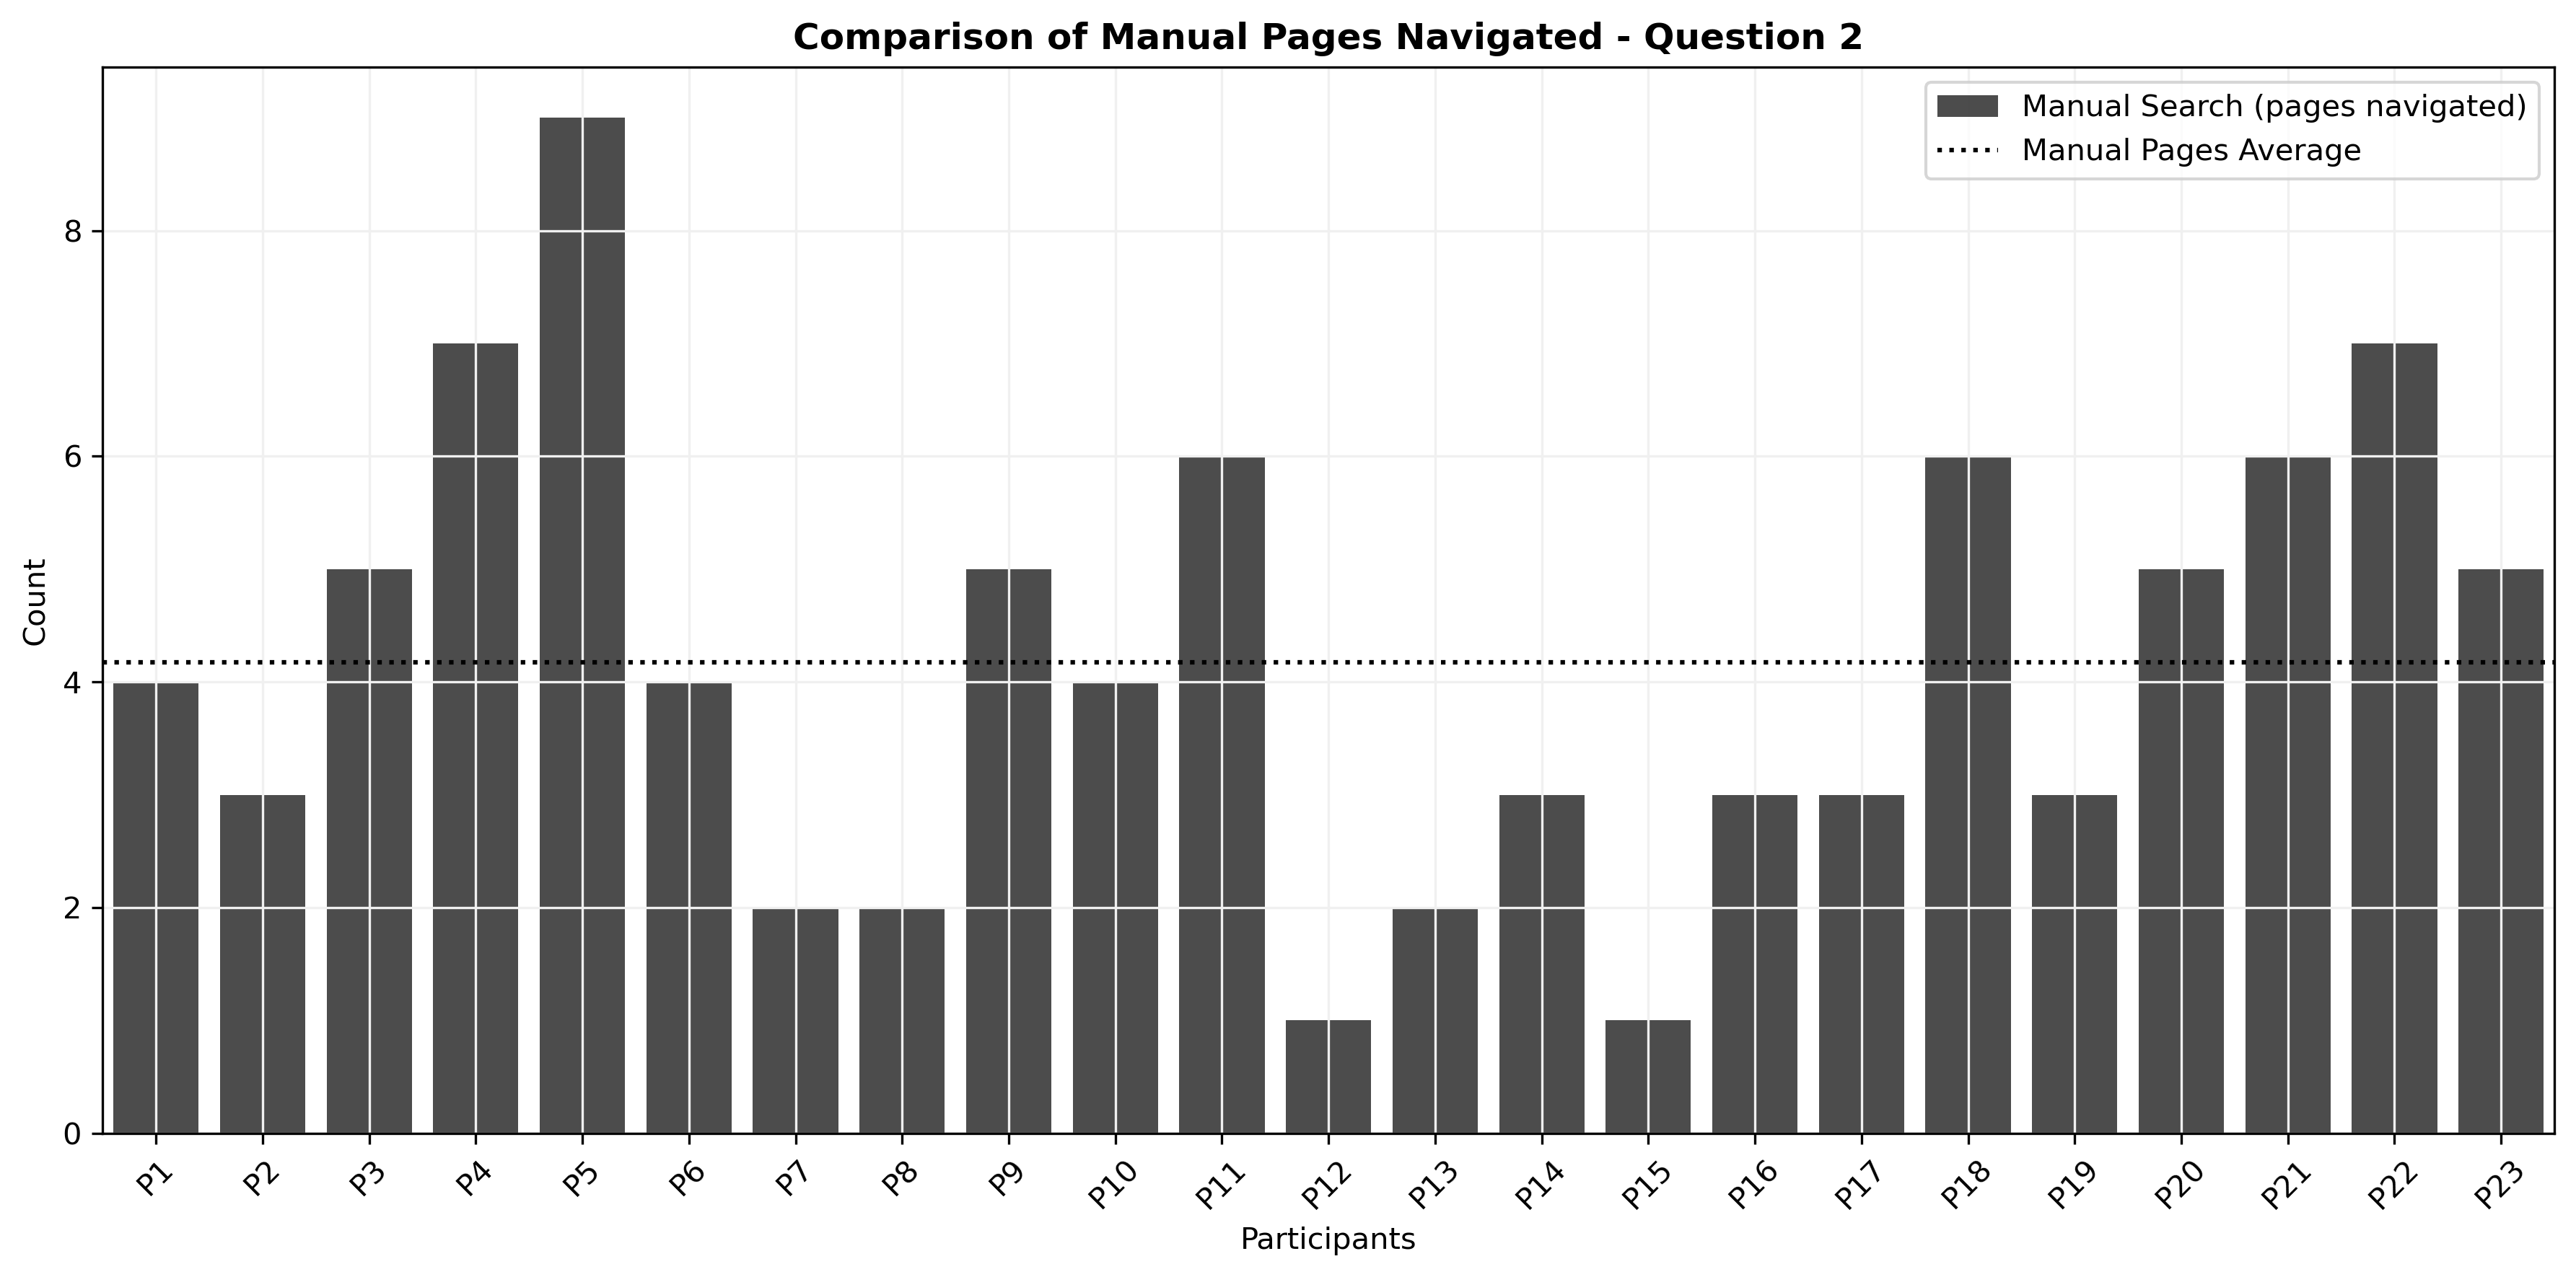

In [4]:
# Example usage for the first sheet
plot_comparisons_with_average(sheet_name='Question 2')

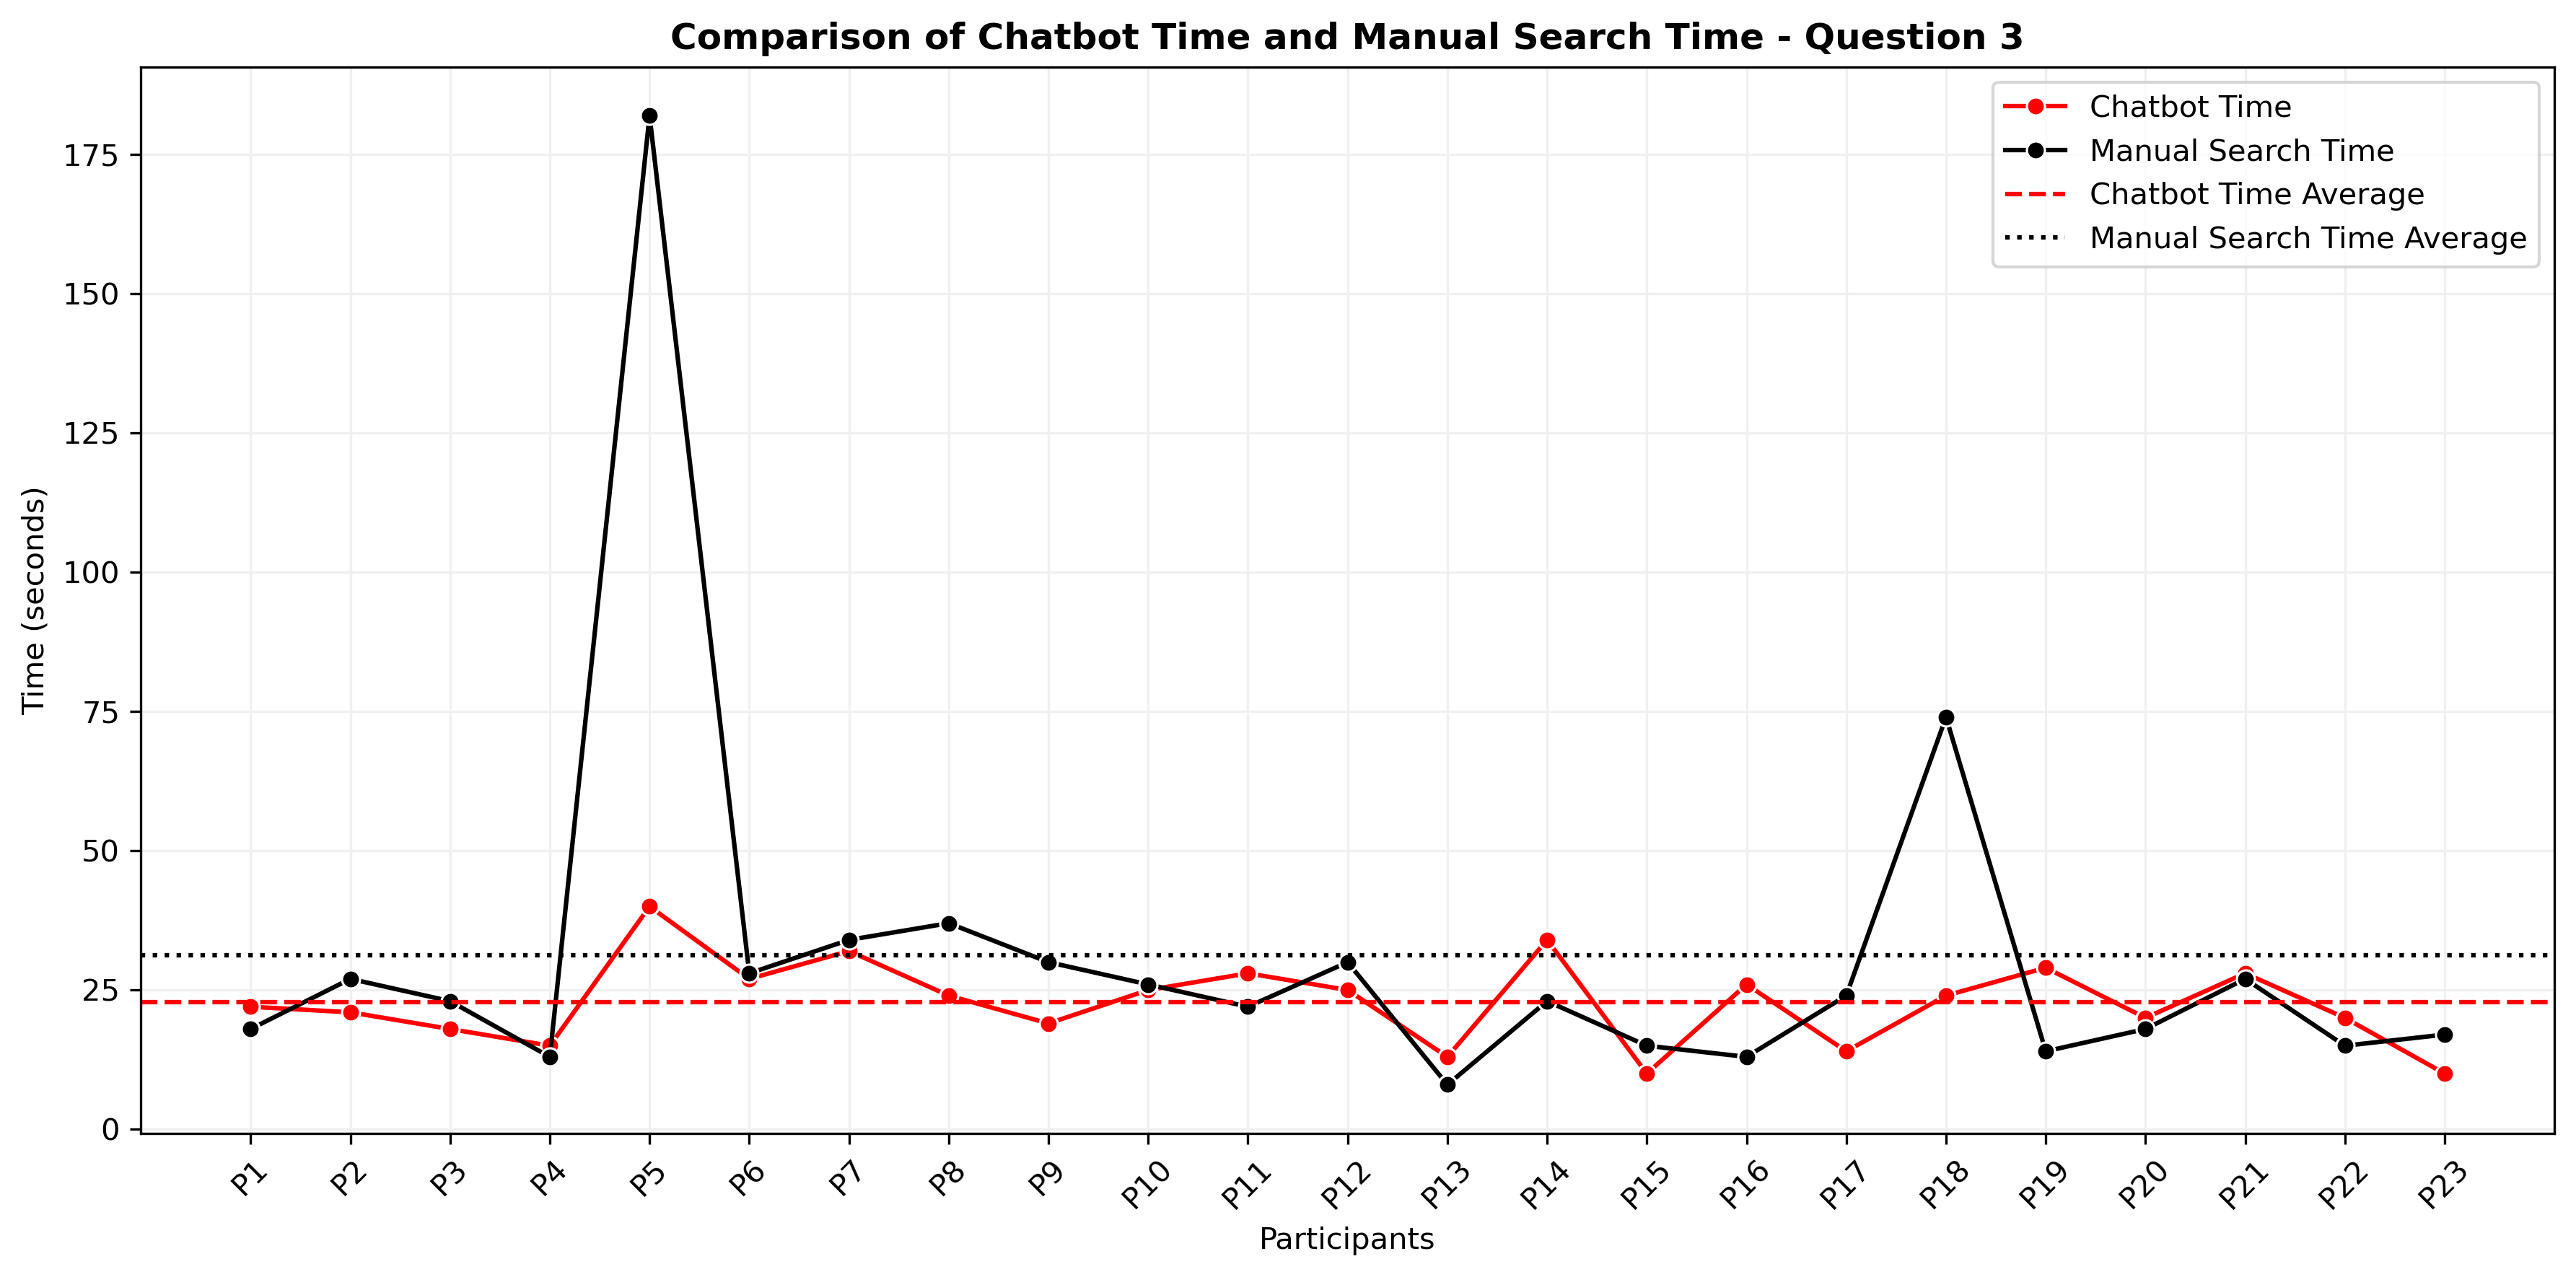

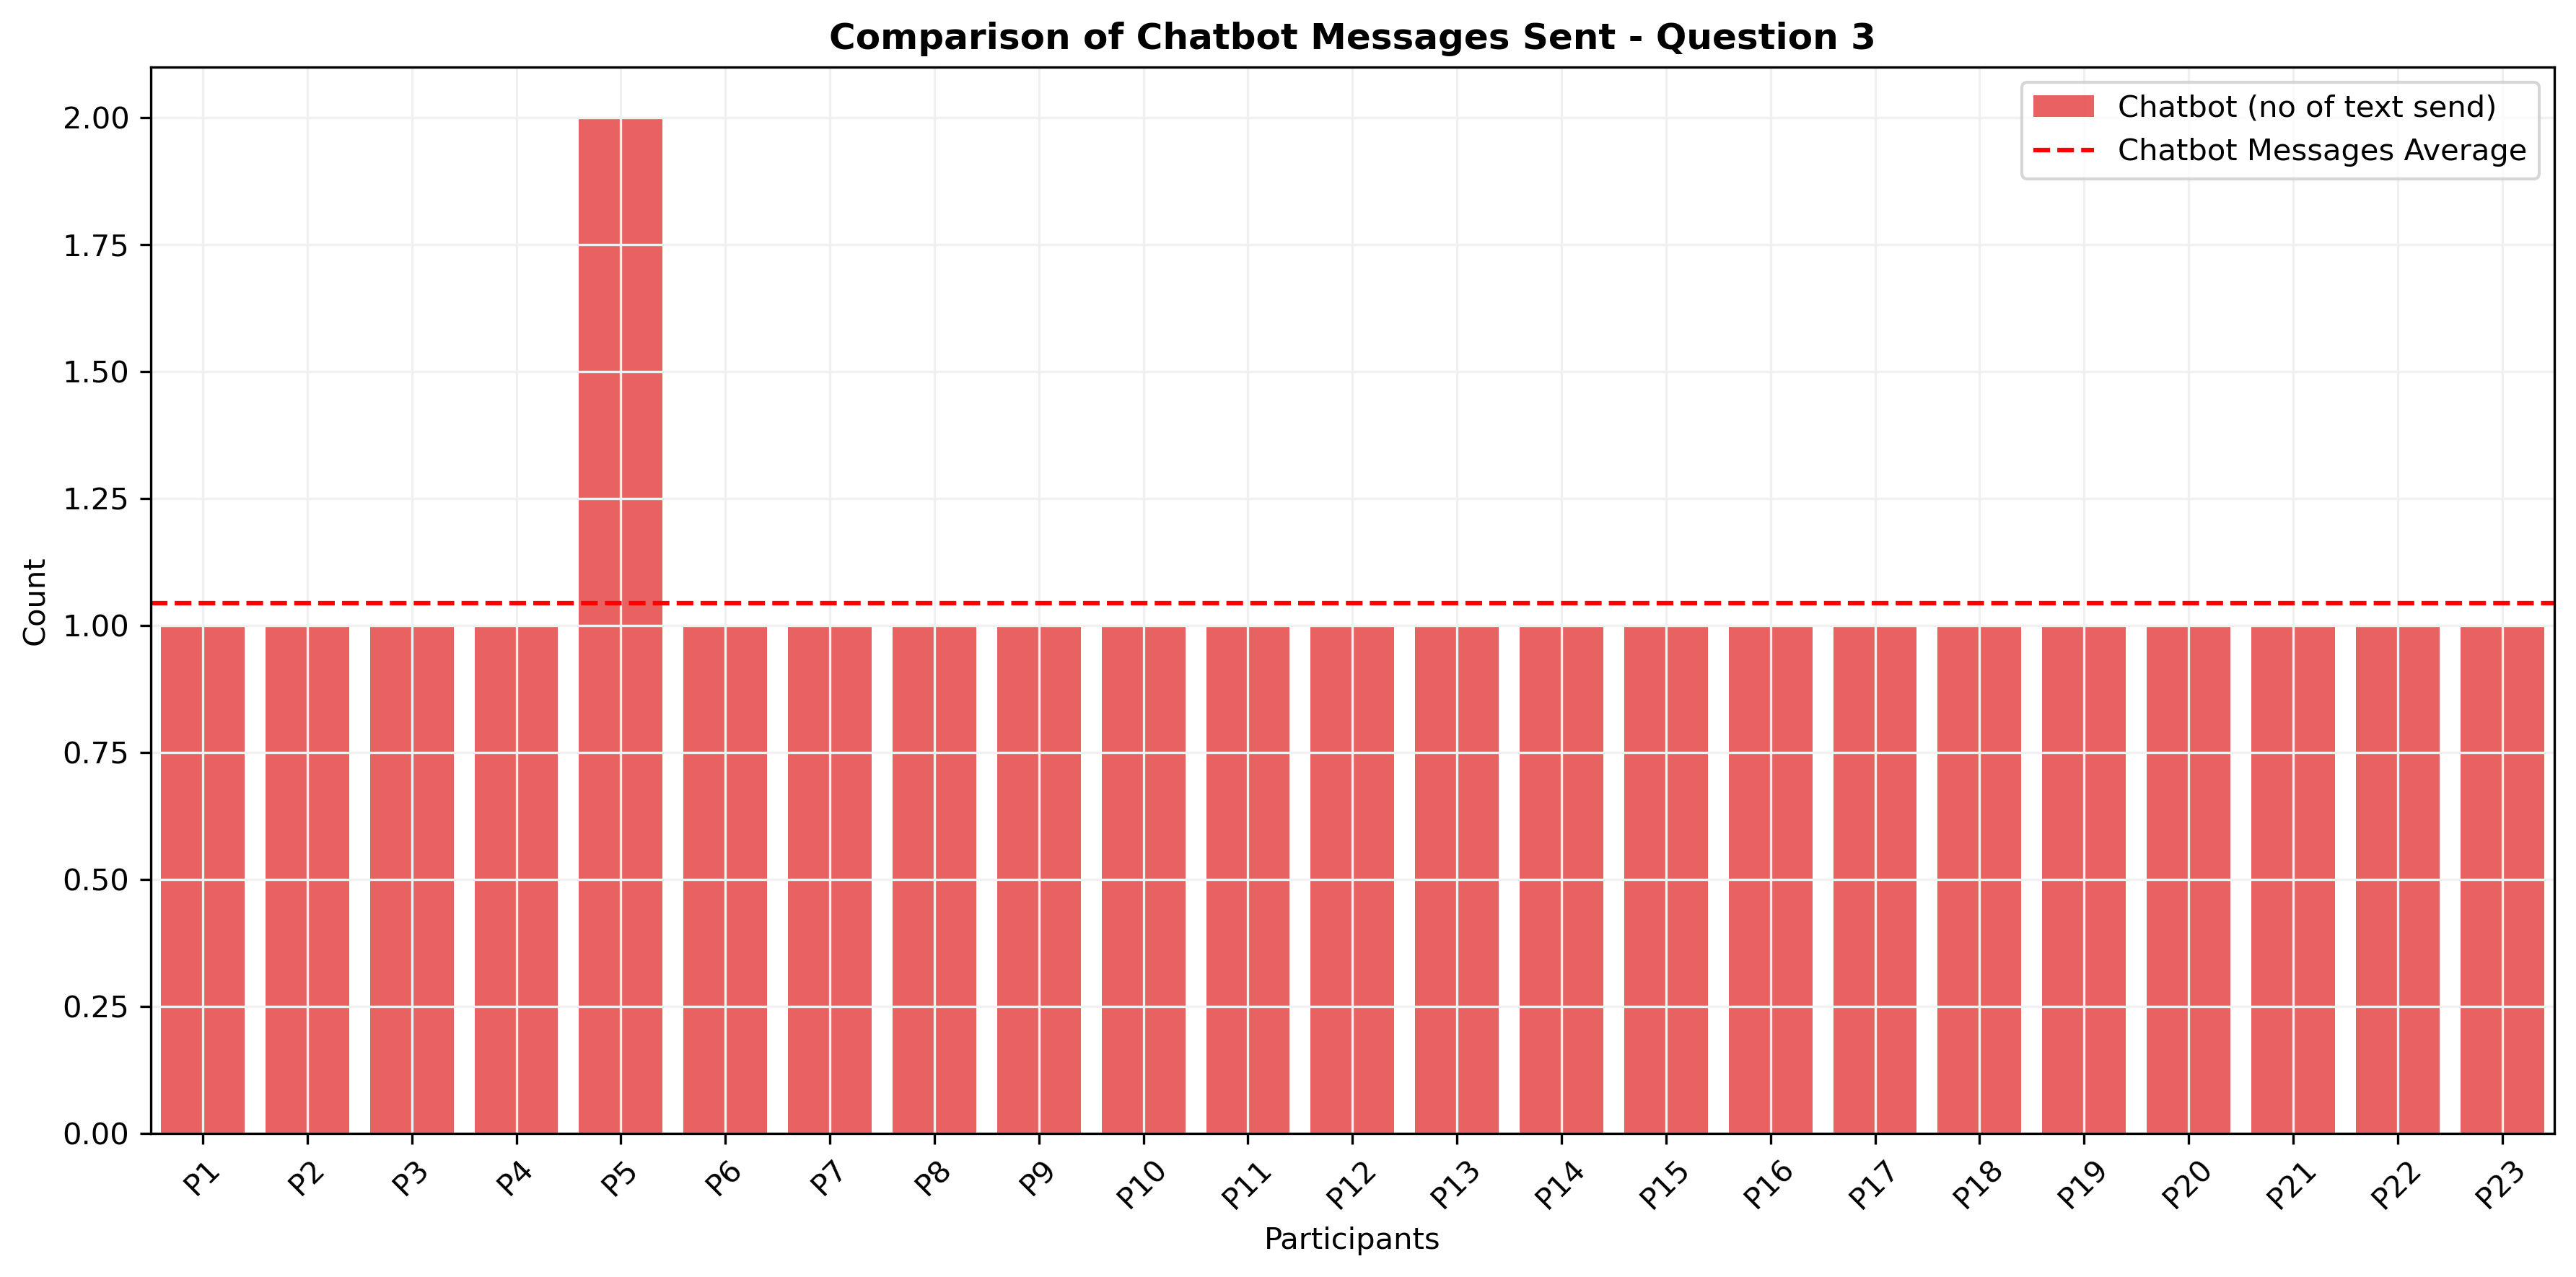

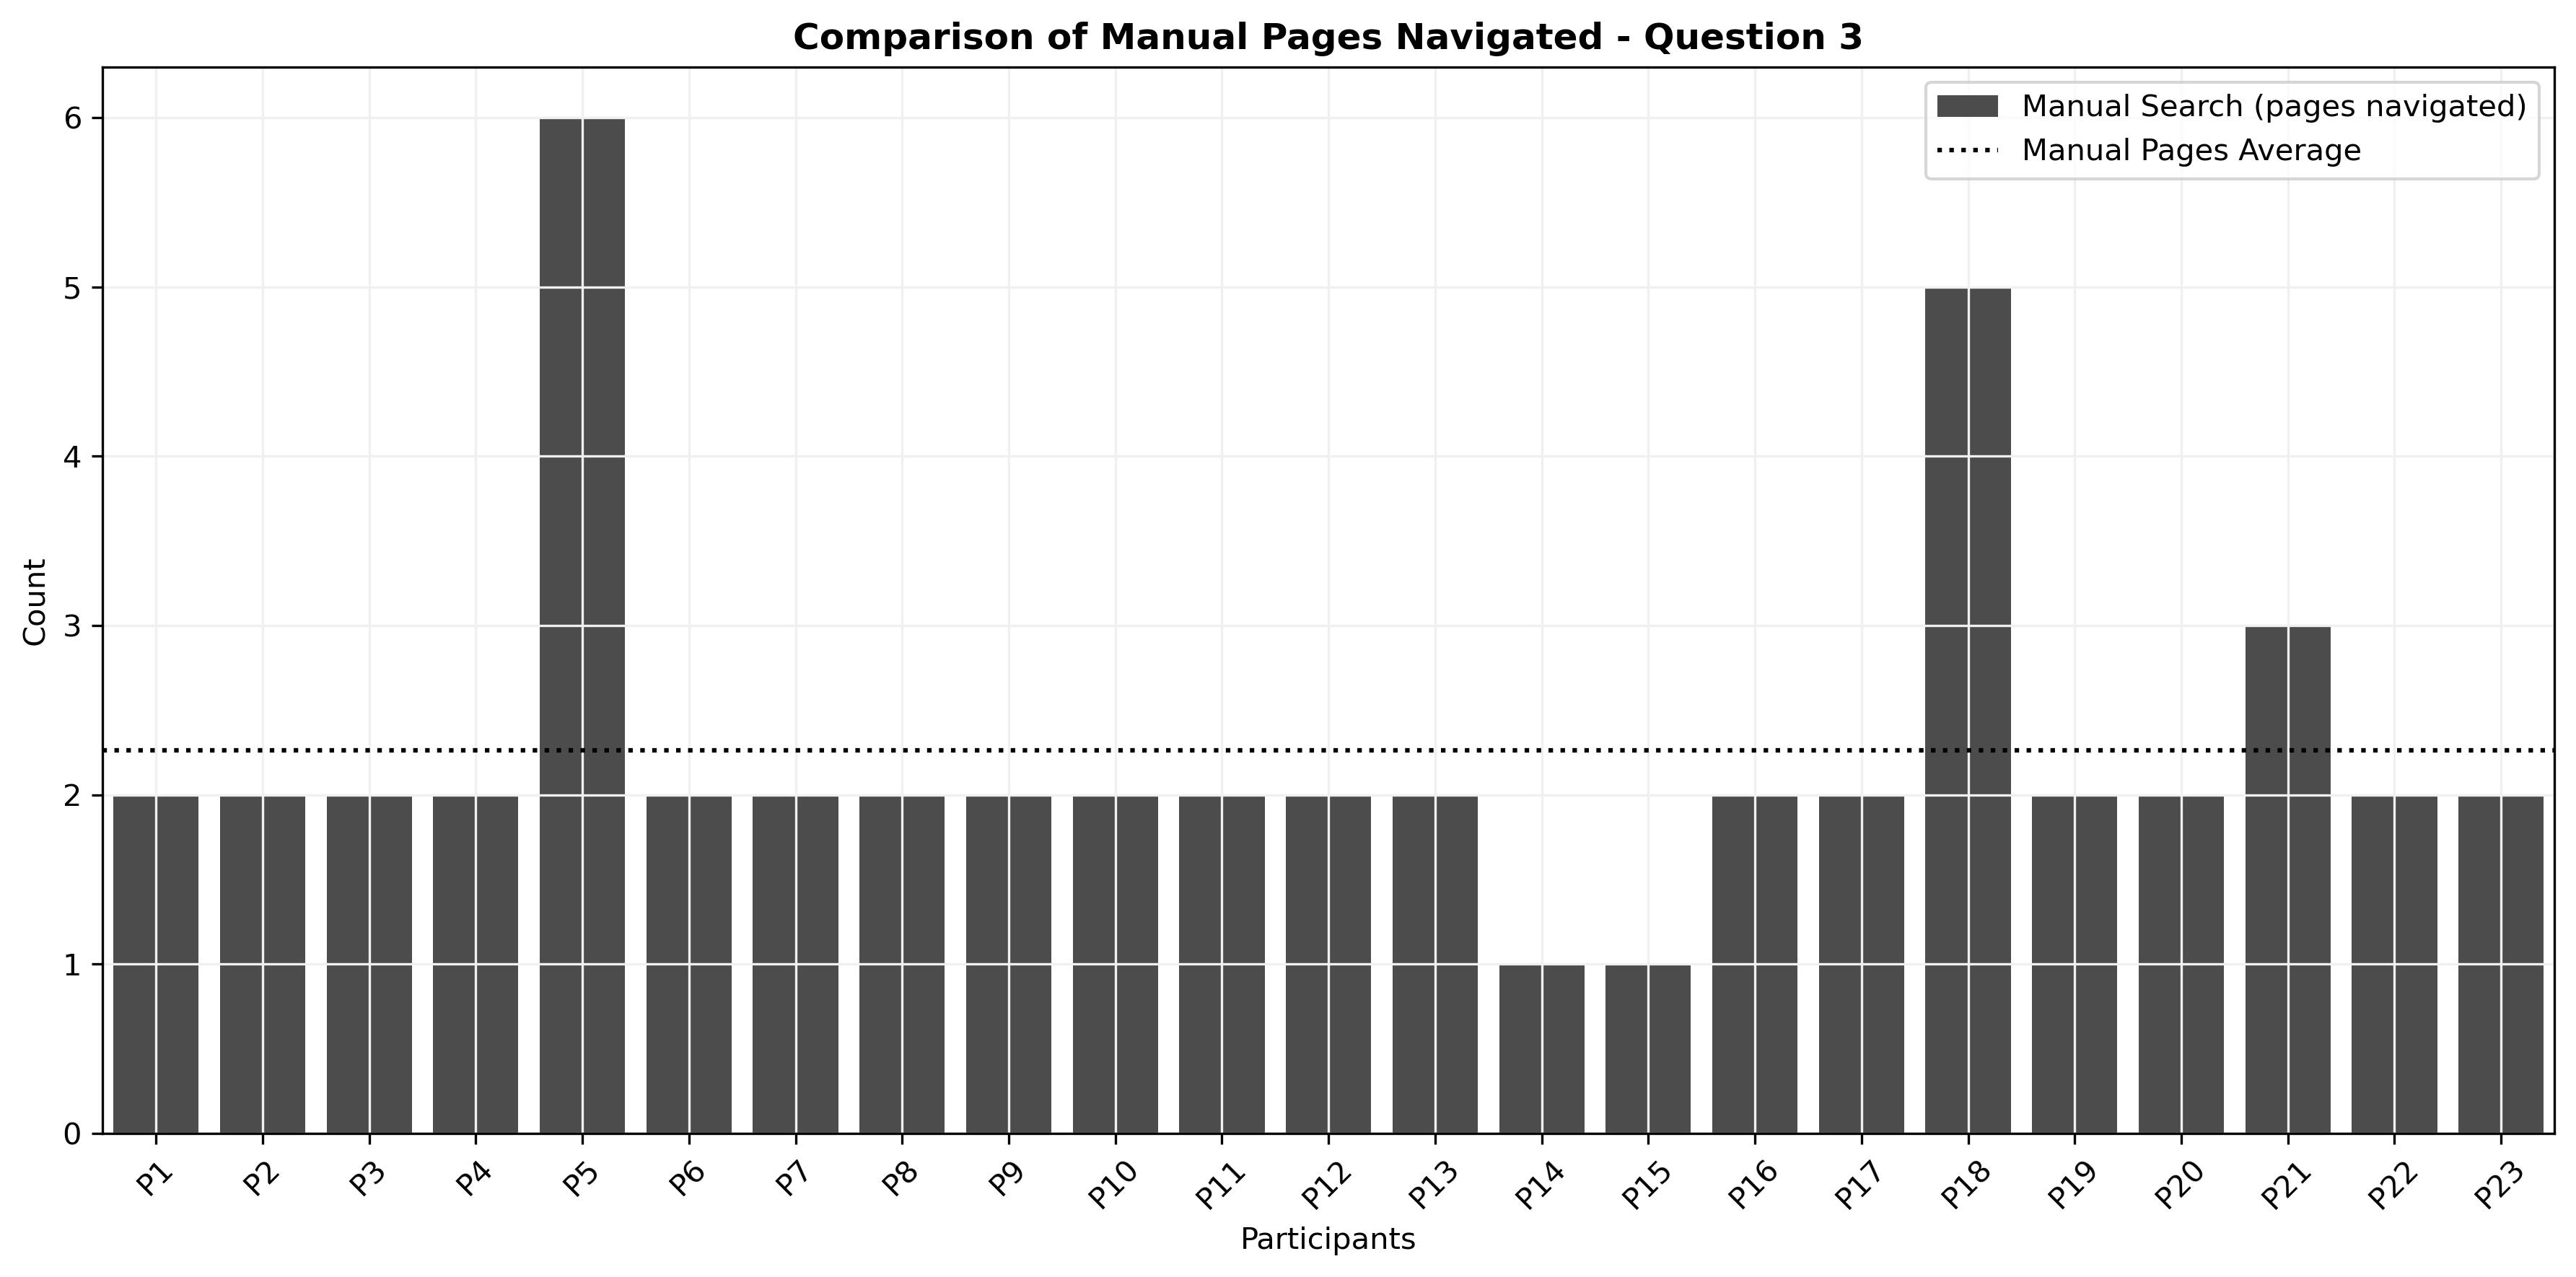

In [5]:
# Example usage for the first sheet
plot_comparisons_with_average(sheet_name='Question 3')

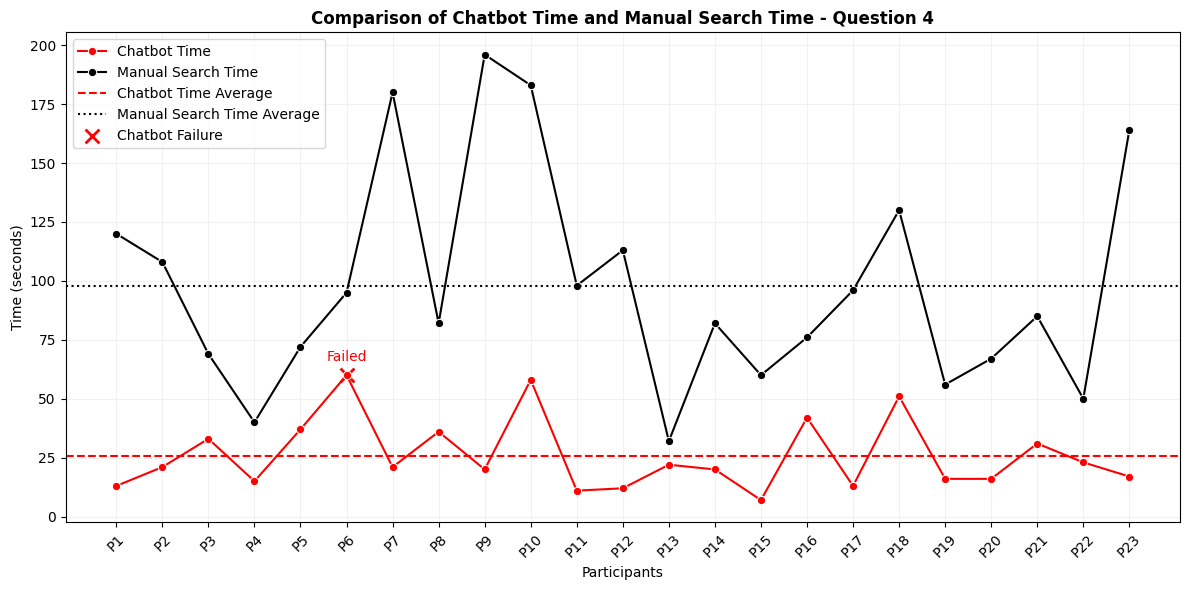

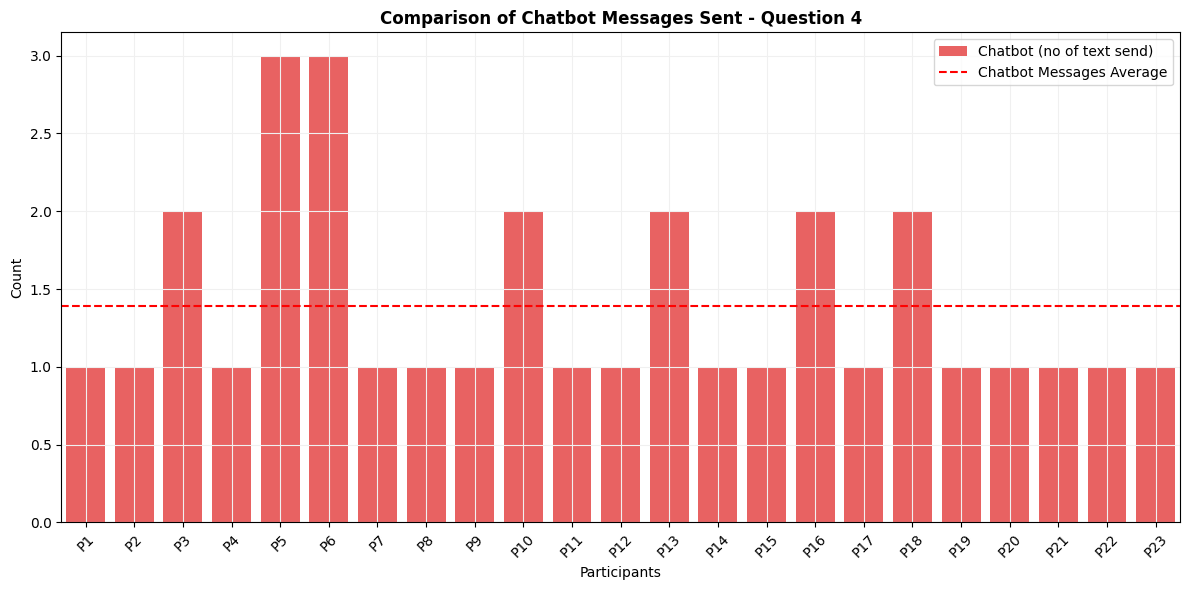

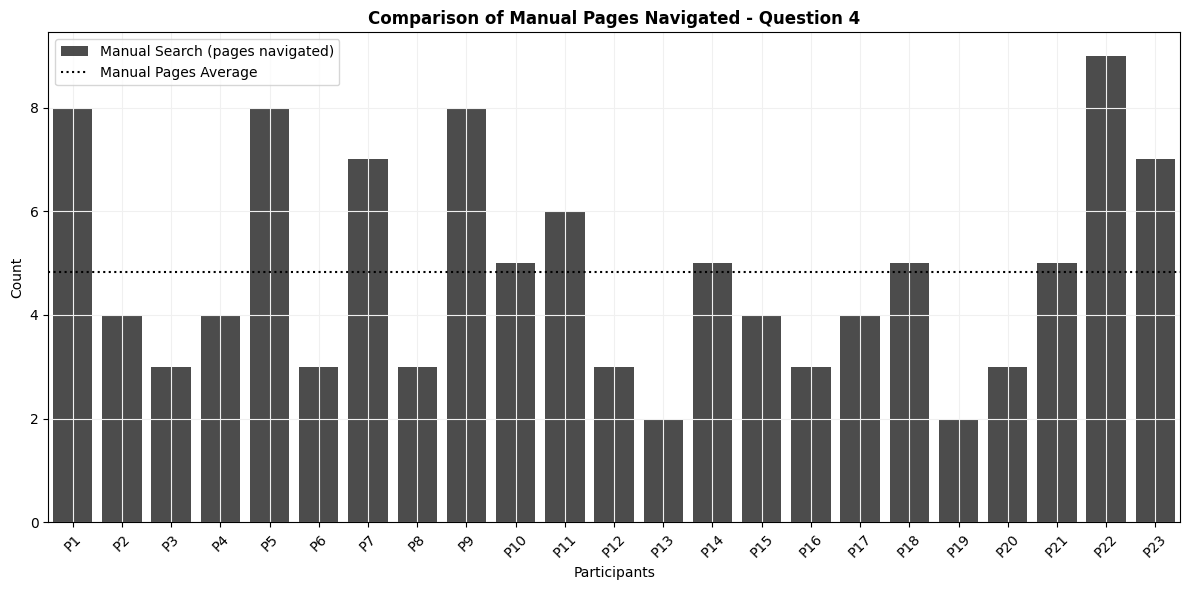

In [20]:
# Example usage for the first sheet
plot_comparisons_with_average(sheet_name='Question 4')

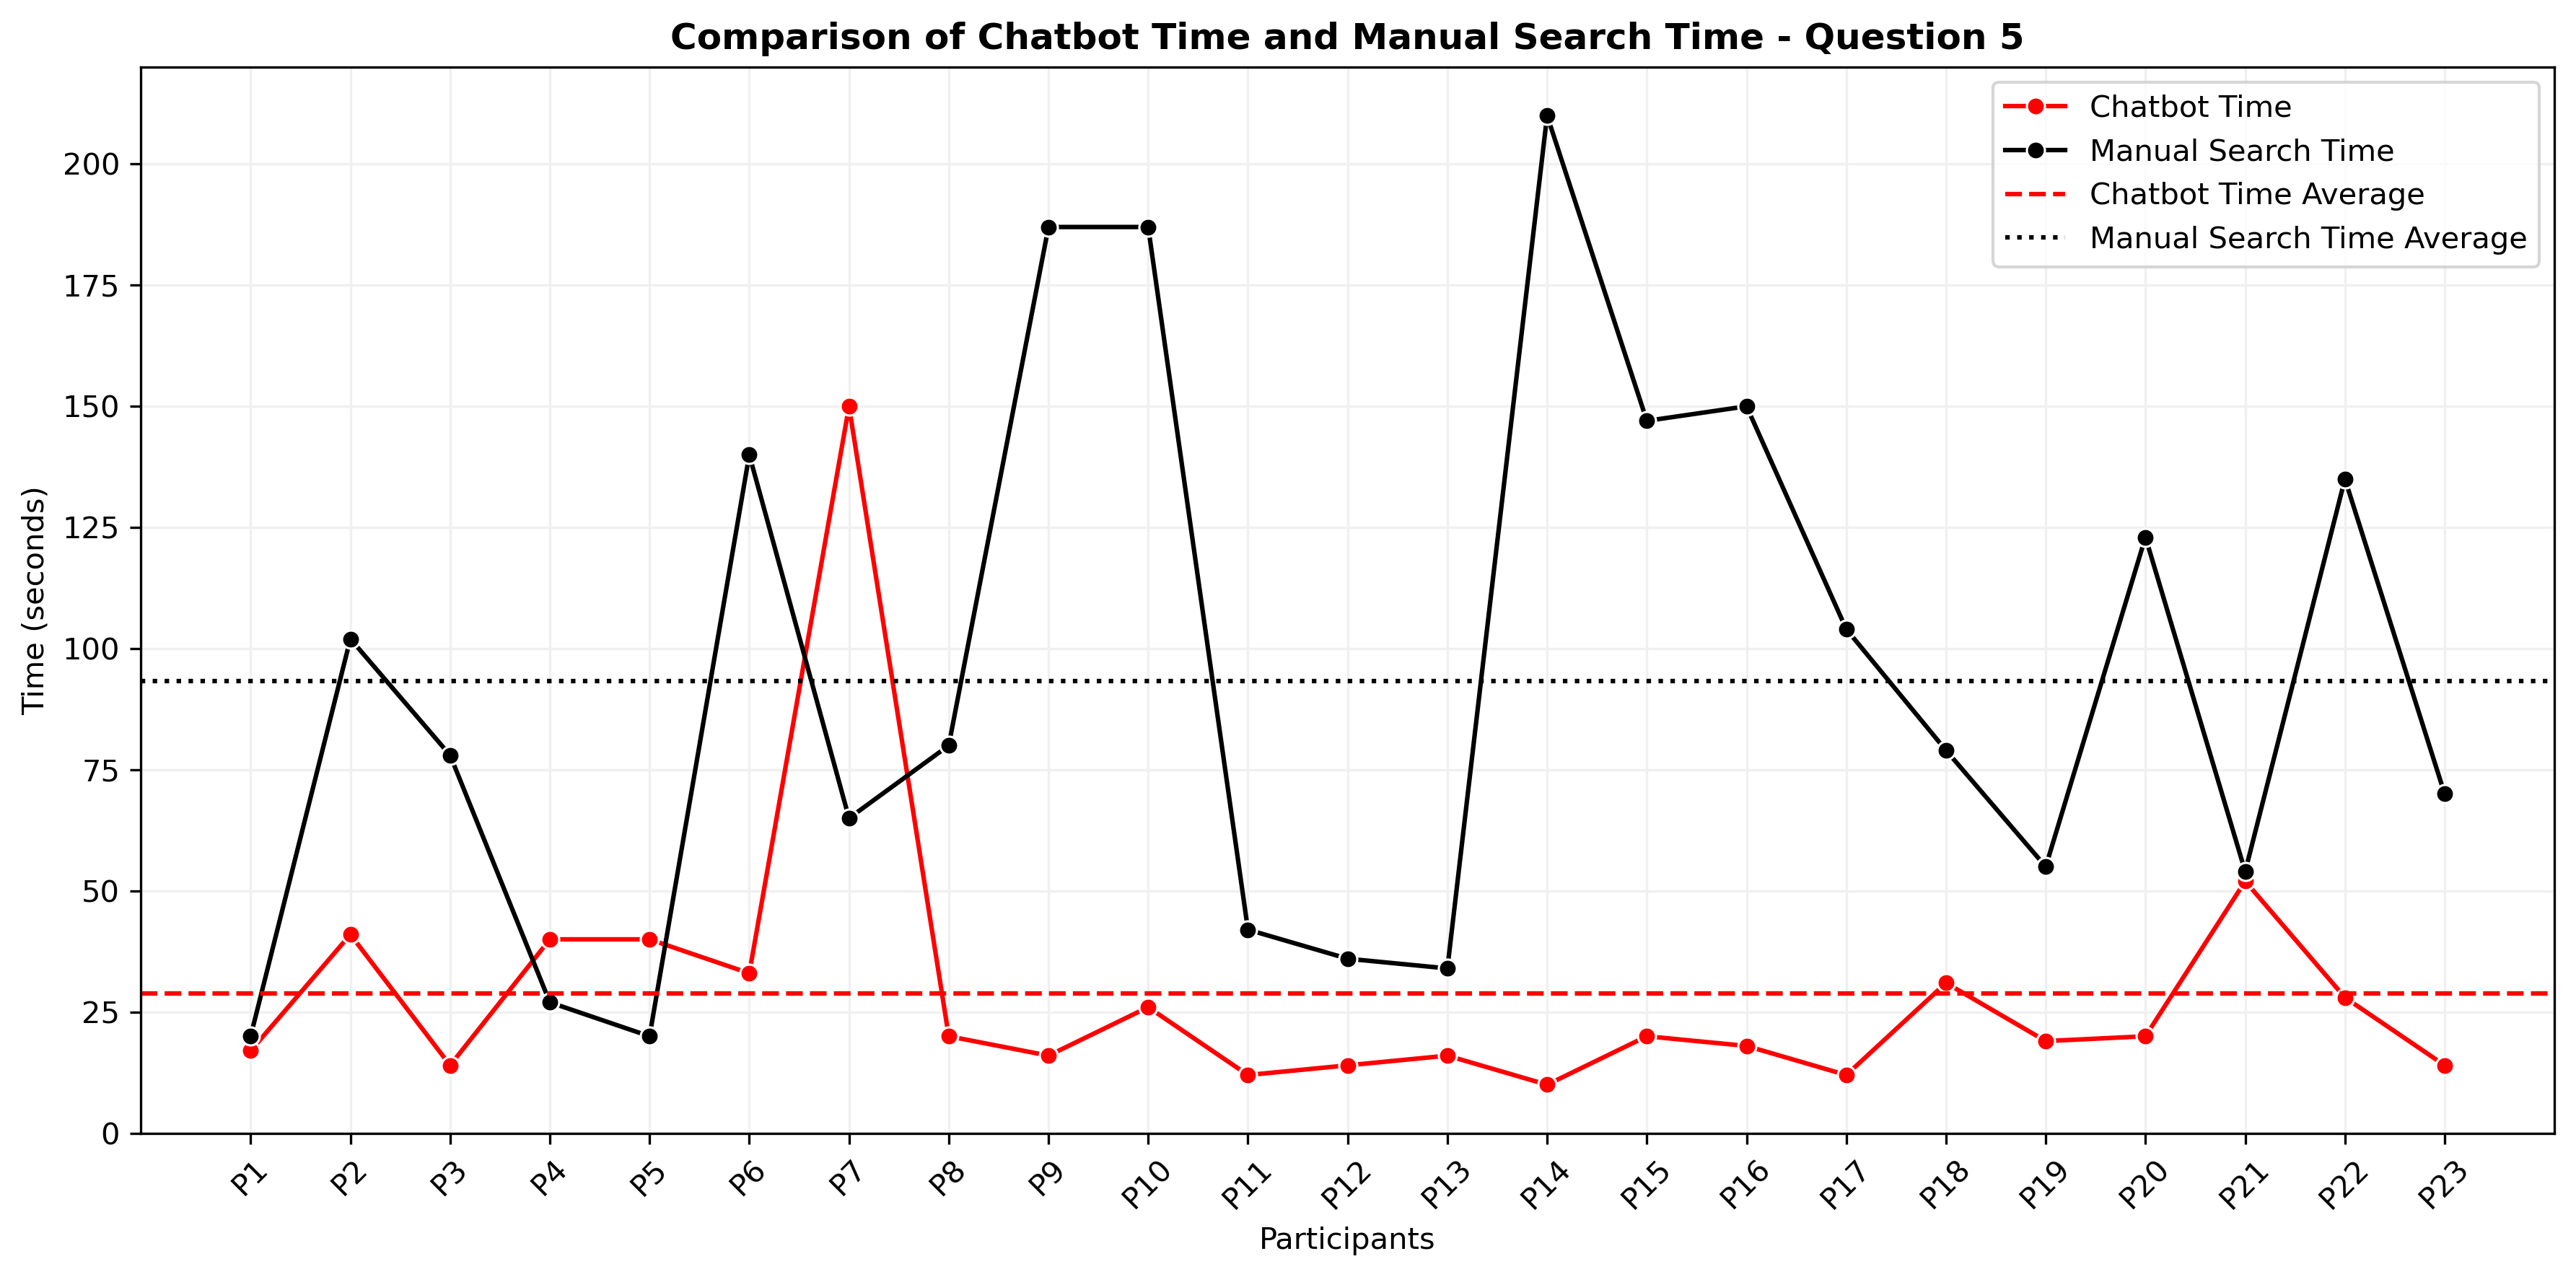

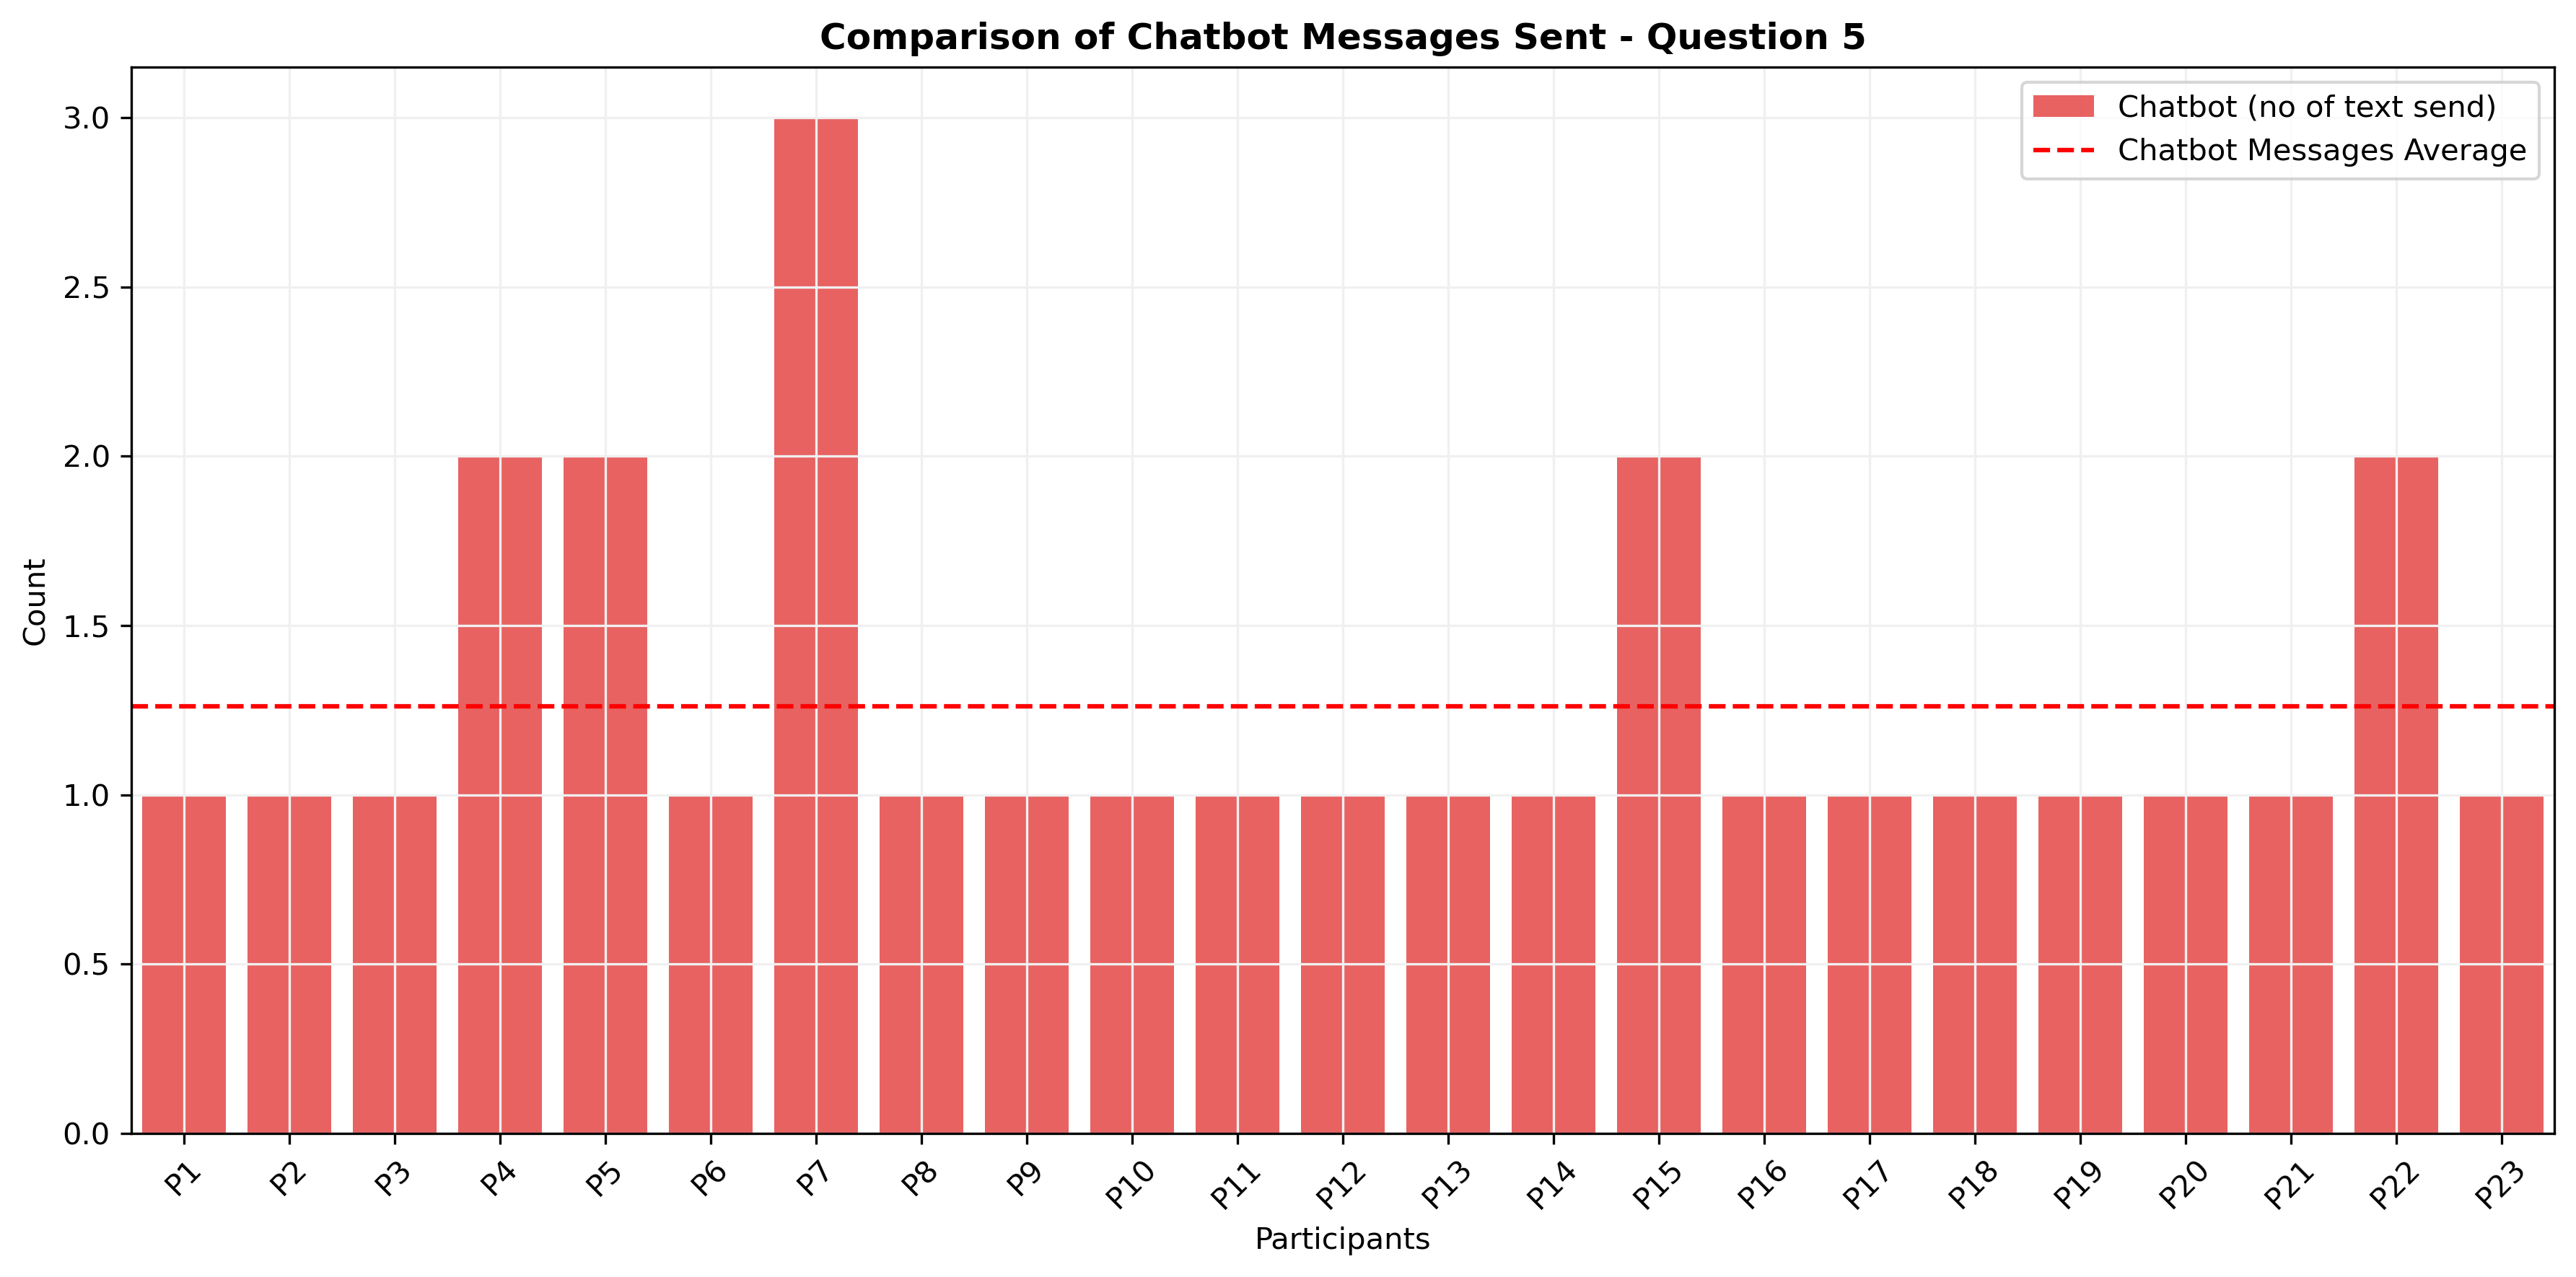

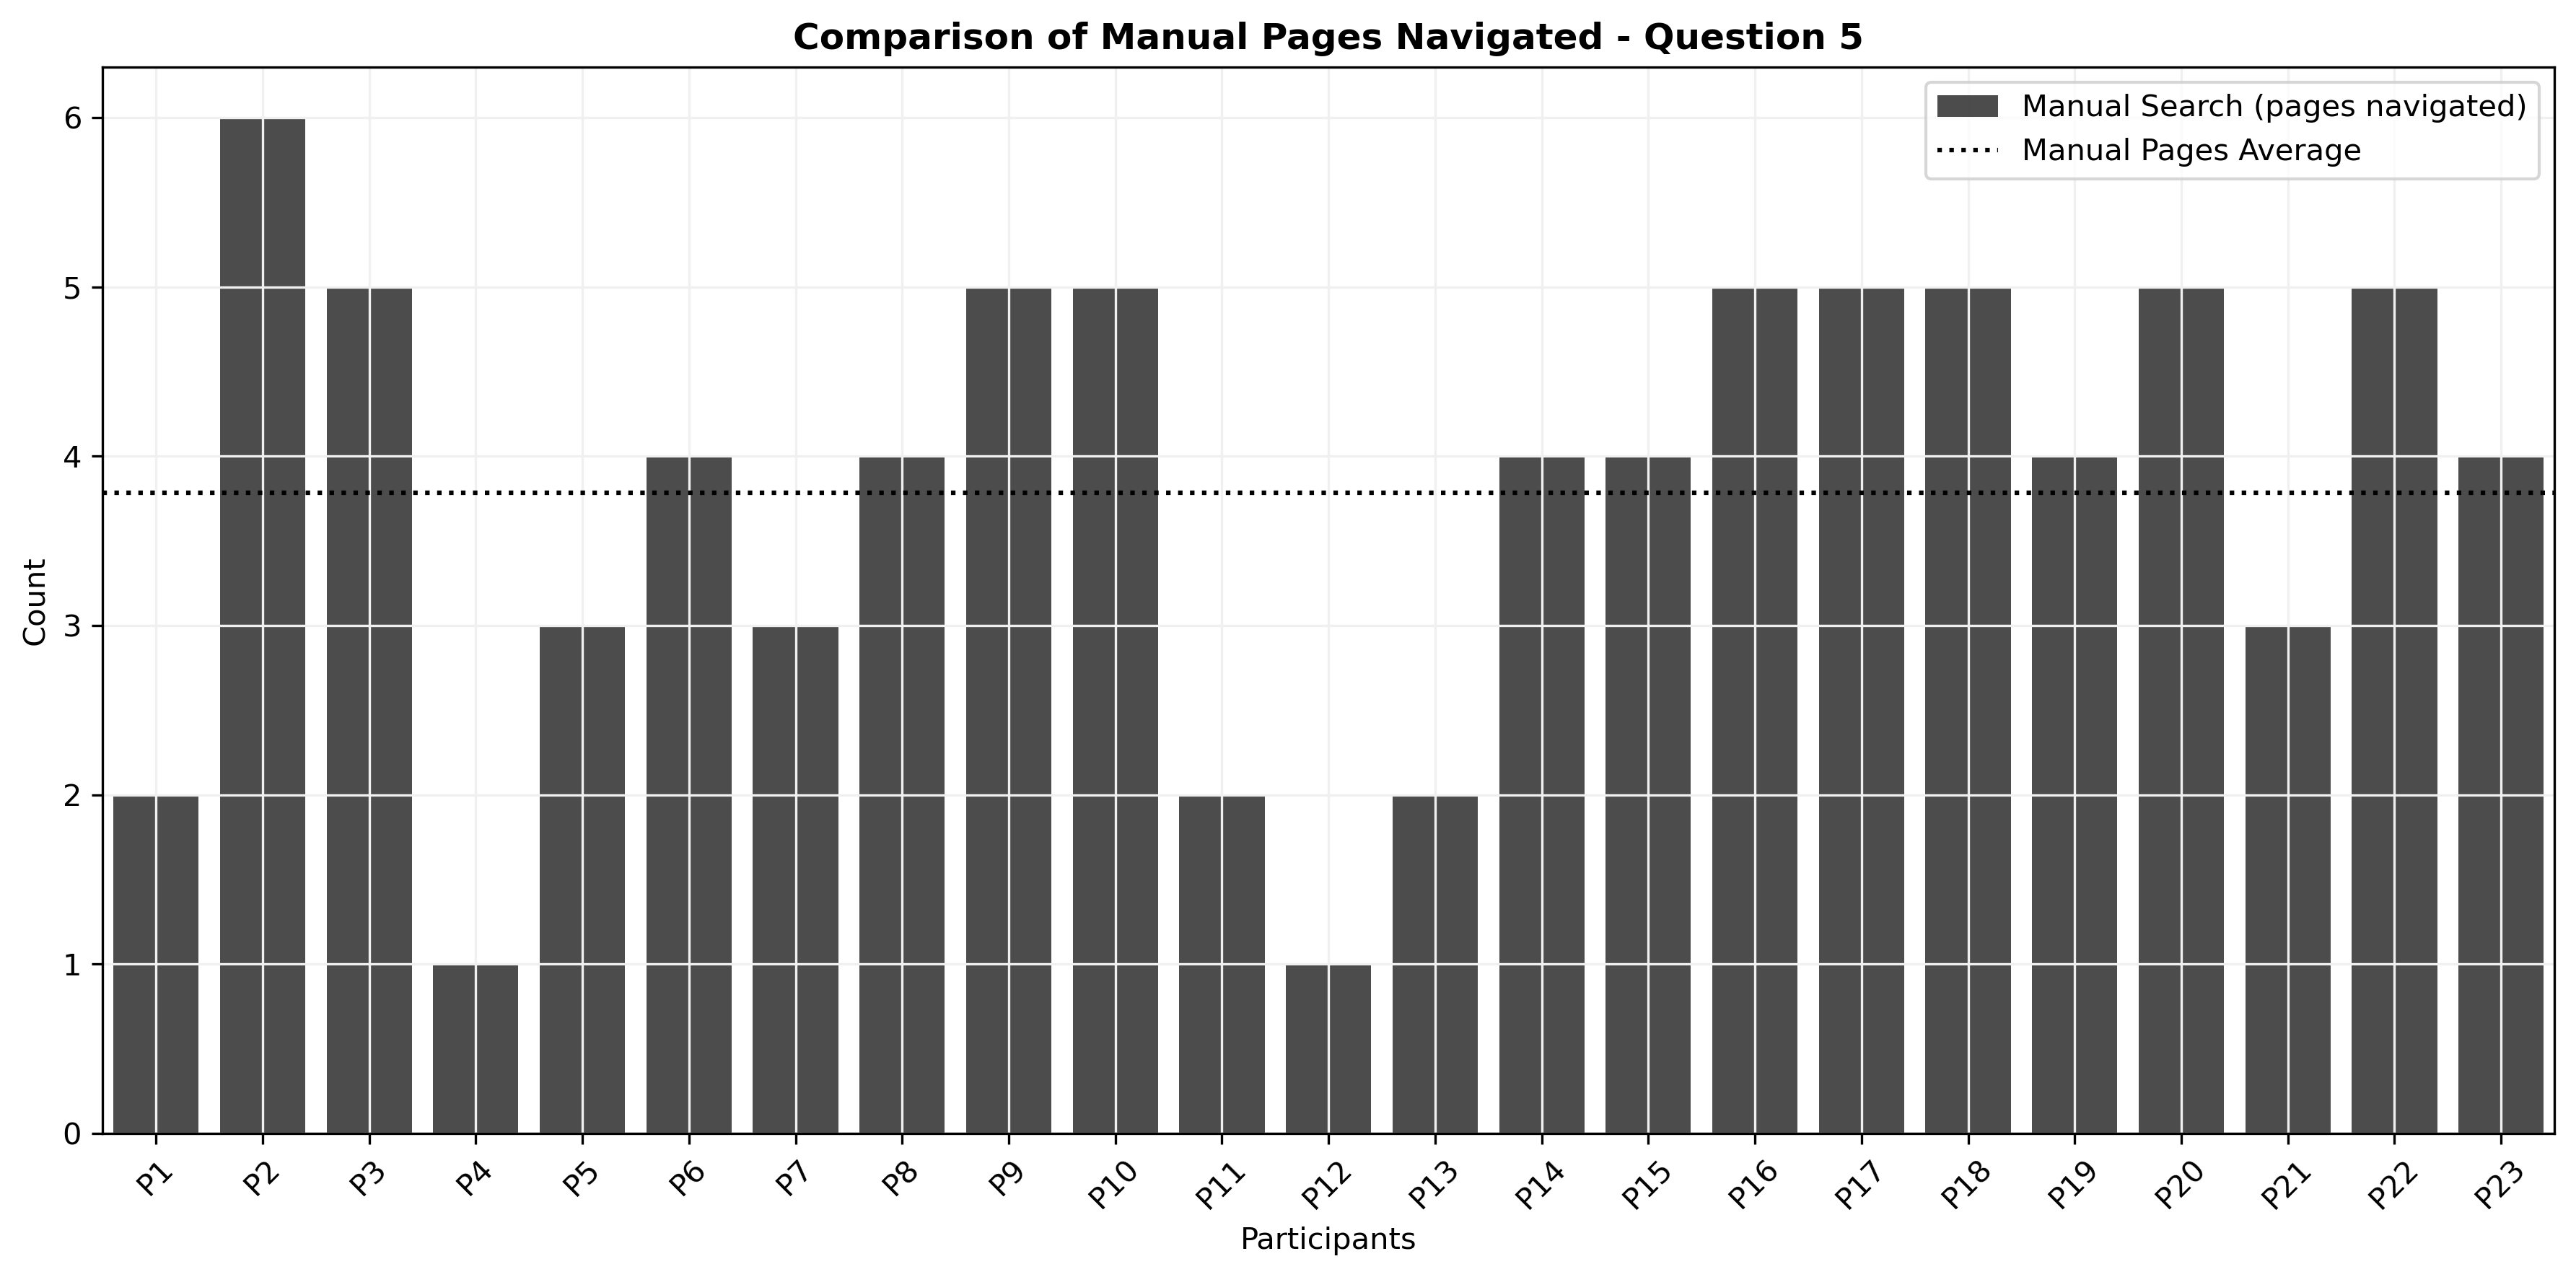

In [6]:
# Example usage for the first sheet
plot_comparisons_with_average(sheet_name='Question 5')